In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline  

from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
from IPython.display import display

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
df1 =pd.read_csv('Rose.csv')

In [3]:
df1.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [4]:
df1.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [5]:
df1.shape

(187, 2)

In [6]:
df1.duplicated().sum()

0

In [7]:
df1.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

In [8]:
df1.isna().sum()

YearMonth    0
Rose         2
dtype: int64

In [9]:
df1.interpolate(inplace=True)

In [10]:
df1.isna().sum()

YearMonth    0
Rose         0
dtype: int64

In [11]:
df1.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [12]:
df1['Date']=pd.date_range(start='1980-01',end='1995-08',freq='M')

In [13]:
df1.head()

,YearMonth,Rose,Date
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [14]:
df1.drop(['YearMonth'],axis=1,inplace=True)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Rose    187 non-null    float64       
 1   Date    187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [16]:
df1.set_index('Date',inplace=True)

In [17]:
df1.head()

,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


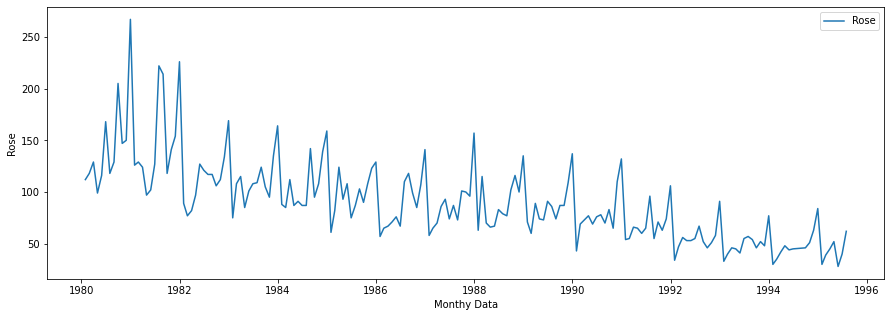

In [18]:
plt.figure(figsize=(15,5))
plt.plot(df1)
plt.xlabel('Monthy Data')
plt.ylabel('Rose')
plt.legend(["Rose"])
#Data looks to have a decreasing seasonality and declining  trend.

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

<AxesSubplot:ylabel='Density'>

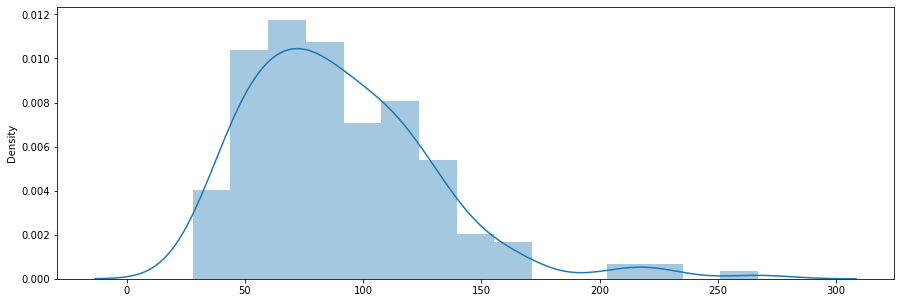

In [19]:
plt.figure(figsize=(15,5))
sns.distplot(df1)
#Data is skewed

Text(0.5, 0, 'Year')

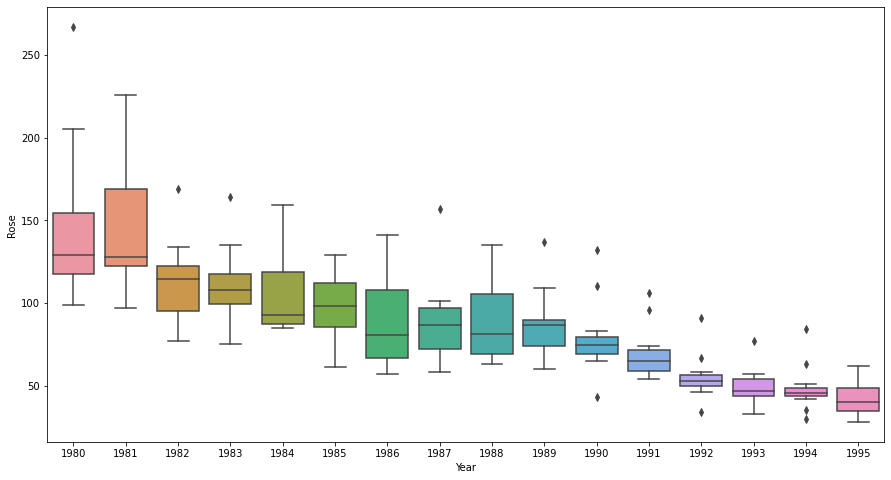

In [20]:
#Outliers are present when looking at corresponding year wise data
plt.figure(figsize=(15,8))
sns.boxplot(df1.index.year,df1['Rose'])
plt.xlabel('Year')

Text(0.5, 0, 'Year')

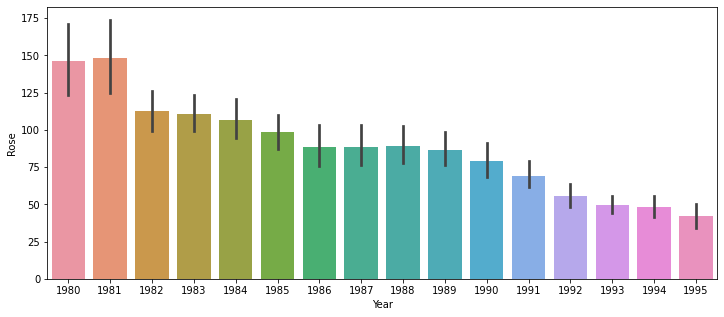

In [21]:
#Data seems to have more or less same sales across the year. 1980 has recorded maximum sales .
plt.figure(figsize=(12,5))
sns.barplot(df1.index.year,df1['Rose'])
plt.xlabel('Year')

Text(0.5, 0, 'Months')

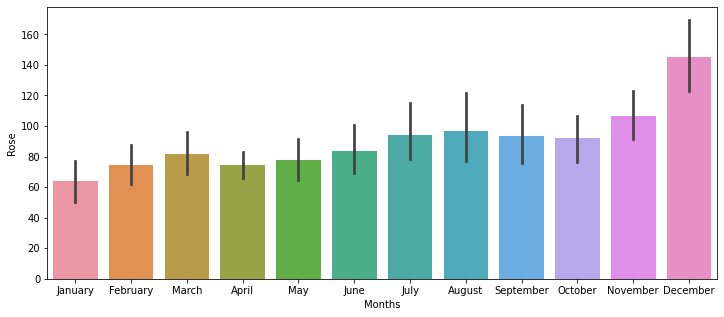

In [22]:
#December have greatest amount of sales across all the months followed be November and Oct. 
# Greater in sales may be due to the celebration in year end
plt.figure(figsize=(12,5))
sns.barplot(df1.index.month_name(),df1['Rose'])
plt.xlabel('Months')

Text(0.5, 0, 'Months')

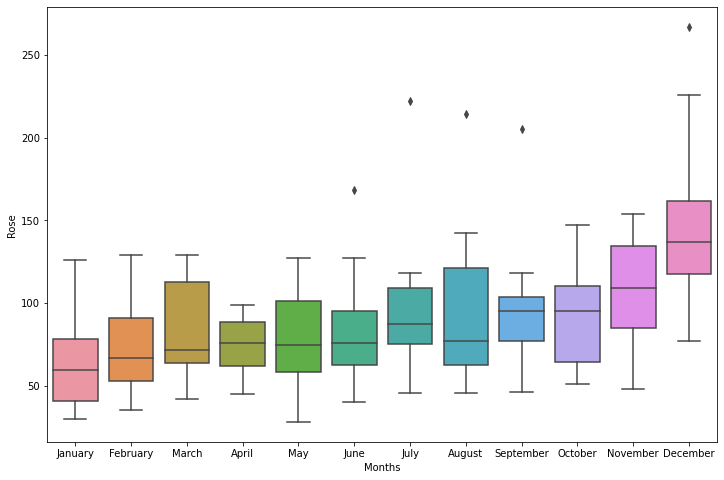

In [23]:
#Box plot is also showing us that December has recorded most number of sales
plt.figure(figsize=(12,8))
sns.boxplot(df1.index.month_name(),df1['Rose'])
plt.xlabel('Months')

<AxesSubplot:xlabel='Date', ylabel='Rose'>

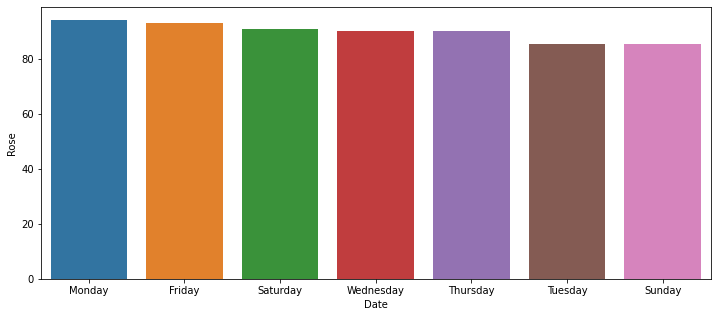

In [24]:
#Saturday registers highest average sales of beer throughout the whole week.
Tot_mean=df1.groupby(df1.index.day_name()).mean().reset_index()
Tot_mean=Tot_mean.sort_values(by='Rose',ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(Tot_mean['Date'],Tot_mean['Rose'])

<AxesSubplot:xlabel='Date', ylabel='Rose'>

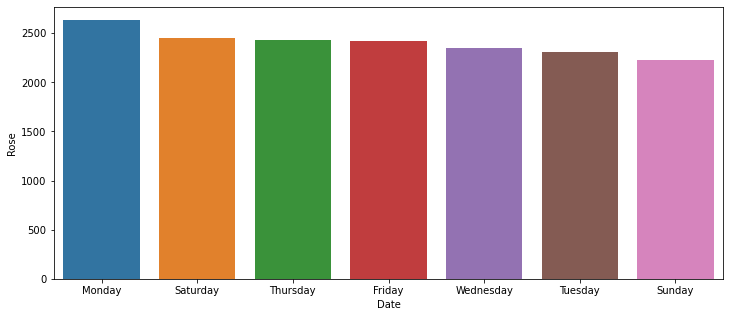

In [25]:
#Monday has the highest sales overall
Tot_sum=df1.groupby(df1.index.day_name()).sum().reset_index()
Tot_sum=Tot_sum.sort_values(by='Rose',ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(Tot_sum['Date'],Tot_sum['Rose'])

## Time series monthplot to understand the spread of Sparkling Sales across different years and within different months across years.

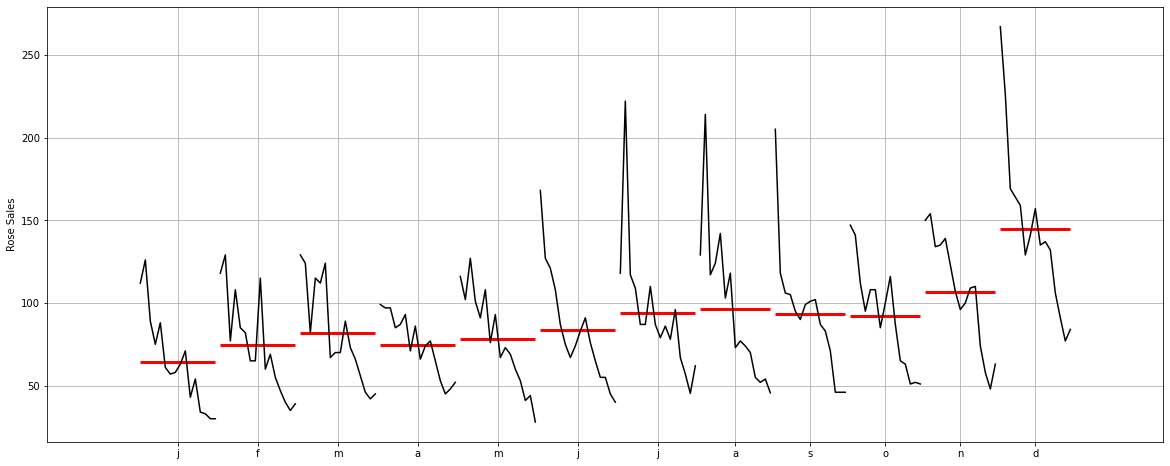

In [26]:
from statsmodels.graphics.tsaplots import month_plot

rcParams['figure.figsize'] = 20,8
month_plot(df1['Rose'],ylabel='Rose Sales')
plt.grid();

## graph of monthly Sparkling's Sales across years

In [27]:
#Creating PIVOT table.
monthly_sales_across_years = pd.pivot_table(df1, values = 'Rose', columns = df1.index.month_name(), index = df1.index.year)
monthly_sales_across_years

Date,April,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,
1980,99.0,129.000000,267.0,118.0,112.0,118.000000,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.000000,226.0,129.0,126.0,222.000000,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.000000,169.0,77.0,89.0,117.000000,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.000000,164.0,108.0,75.0,109.000000,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.000000,159.0,85.0,88.0,87.000000,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.000000,129.0,82.0,61.0,87.000000,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.000000,141.0,65.0,57.0,110.000000,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.000000,157.0,65.0,58.0,87.000000,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.000000,135.0,115.0,63.0,79.000000,83.0,70.0,67.0,100.0,116.0,102.0


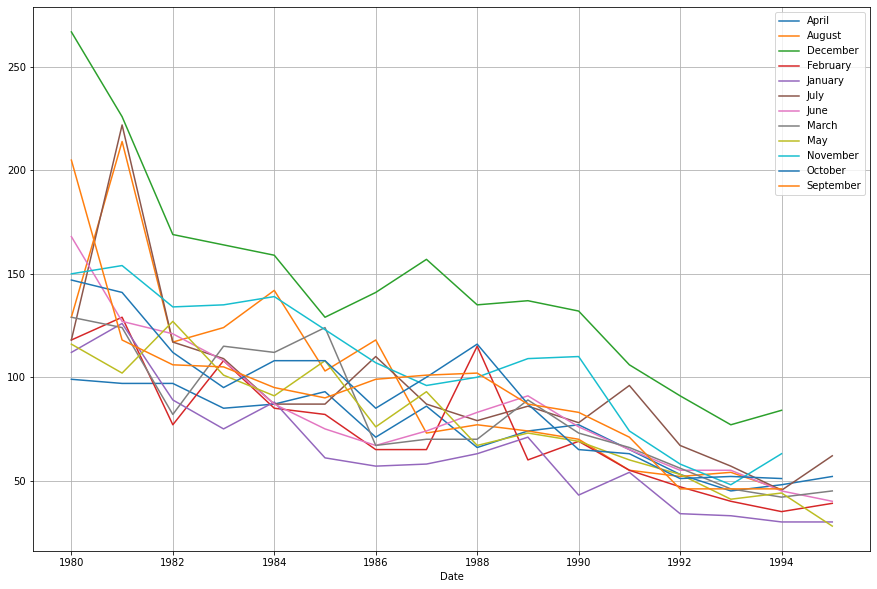

In [28]:
#Dec registers the highest amount of sales
monthly_sales_across_years.plot(figsize=(15,10))
plt.grid()
plt.legend(loc='best');

## Empirical Cumulative Distribution

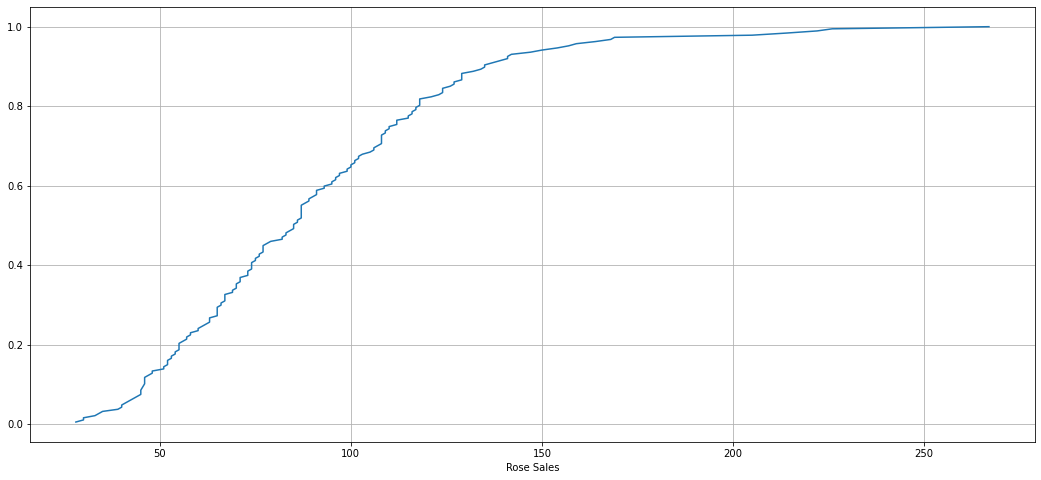

In [29]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df1['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose Sales');

## Average Sparkling Sales per month and the month on month percentage change of Sparkling Sales.

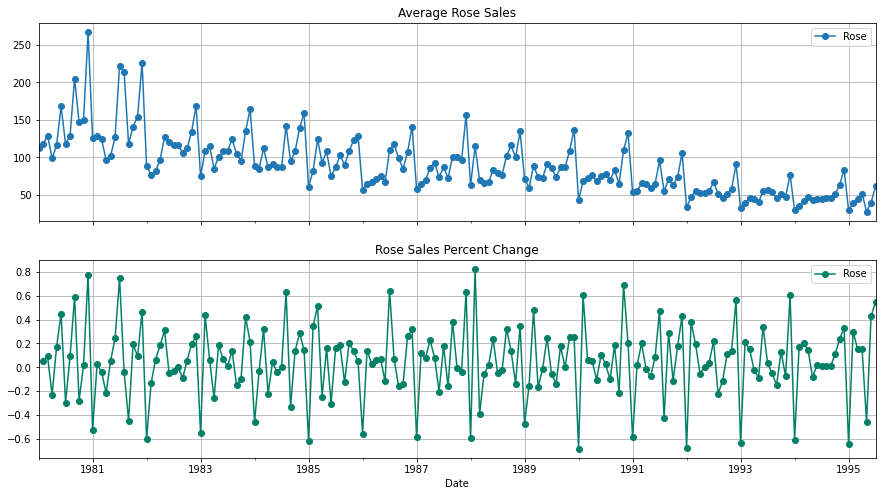

In [30]:
# group by date and get average Sparkling Sales, and precent change
average    = df1.groupby(df1.index)["Rose"].mean()
pct_change = df1.groupby(df1.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparkling Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Sales Percent Change",grid=True)

## Decomposition of dataset

In [31]:
#As the seasonal variation is more or less constant hence we will going to choose additive model.
decompose_addition=seasonal_decompose(df1,model='additive',extrapolate_trend='freq')

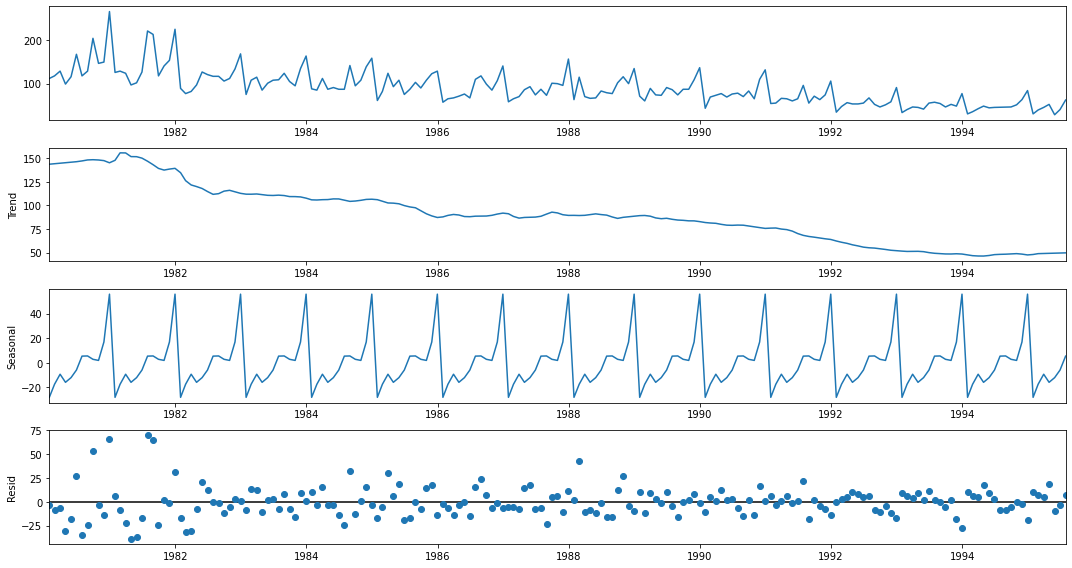

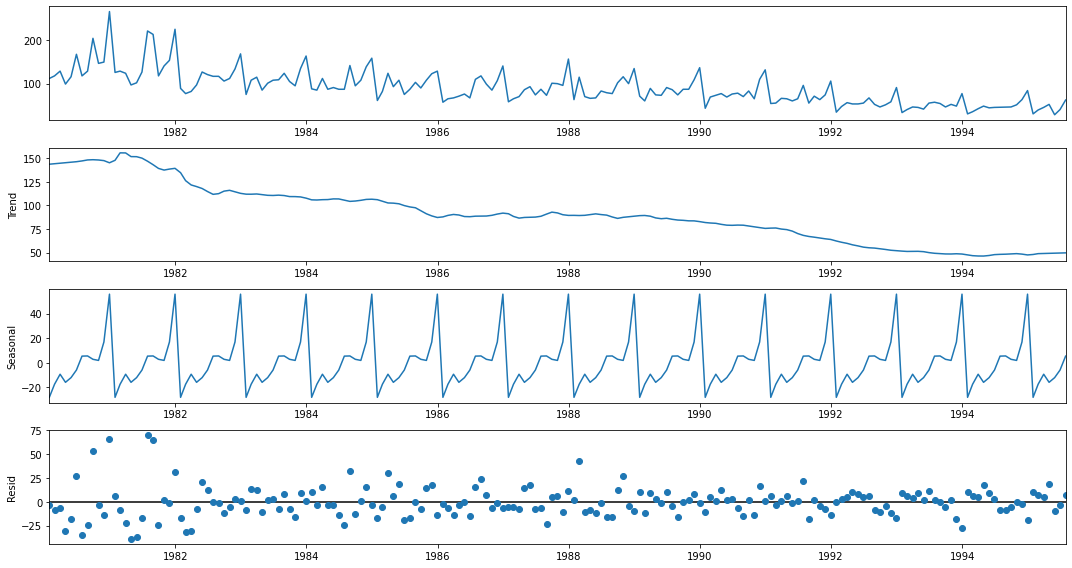

In [32]:
rcParams['figure.figsize'] = 15,8
decompose_addition.plot()

In [33]:
trend_add = decompose_addition.trend
seasonality_add = decompose_addition.seasonal
residual_add = decompose_addition.resid

print('Trend','\n',trend_add.head(),'\n')
print('Seasonality','\n',seasonality_add.head(),'\n')
print('Residual','\n',residual_add.head(),'\n')

Trend 
 Date
1980-01-31    143.619658
1980-02-29    144.148504
1980-03-31    144.677350
1980-04-30    145.206197
1980-05-31    145.735043
Name: trend, dtype: float64 

Seasonality 
 Date
1980-01-31   -28.058855
1980-02-29   -17.428254
1980-03-31    -9.278095
1980-04-30   -15.844951
1980-05-31   -12.036806
Name: seasonal, dtype: float64 

Residual 
 Date
1980-01-31    -3.560804
1980-02-29    -8.720251
1980-03-31    -6.399255
1980-04-30   -30.361246
1980-05-31   -17.698237
Name: resid, dtype: float64 



In [34]:
#Creating decomposition using multiplicative model
decompose_multi=seasonal_decompose(df1,model='multiplicative',extrapolate_trend='freq')

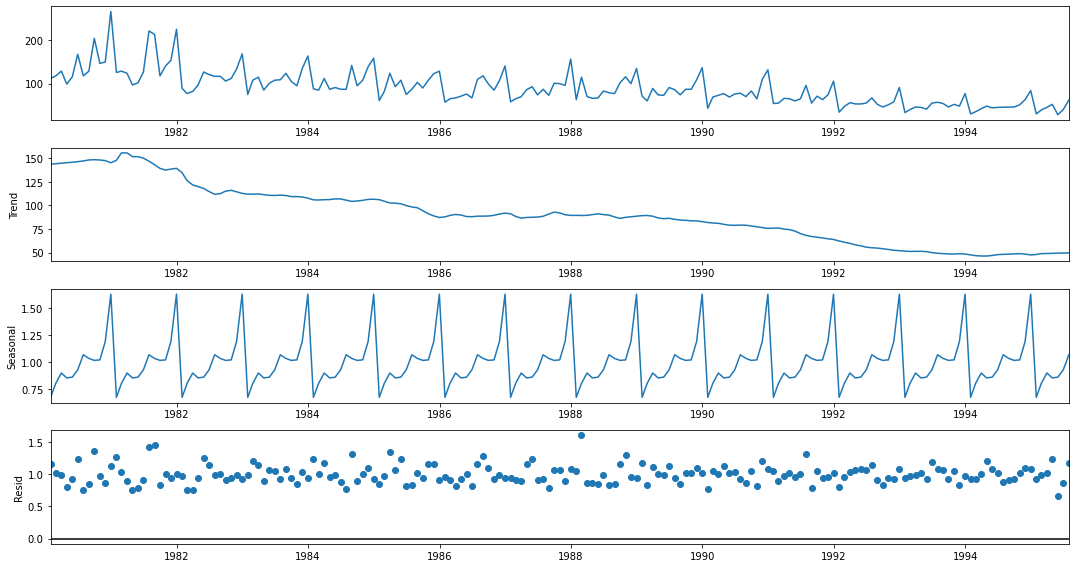

<Figure size 1080x360 with 0 Axes>

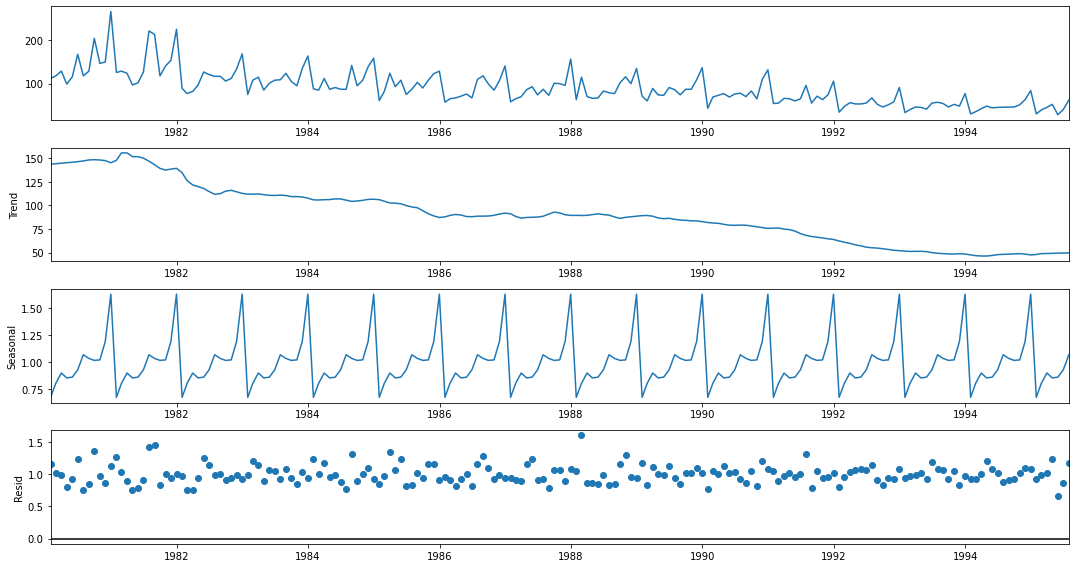

In [35]:
plt.figure(figsize=(15,5))
decompose_multi.plot()

In [36]:
trend_mul = decompose_multi.trend
seasonality_mul = decompose_multi.seasonal
residual_mul = decompose_multi.resid

print('Trend','\n',trend_mul.head(),'\n')
print('Seasonality','\n',seasonality_mul.head(),'\n')
print('Residual','\n',residual_mul.head(),'\n')

Trend 
 Date
1980-01-31    143.619658
1980-02-29    144.148504
1980-03-31    144.677350
1980-04-30    145.206197
1980-05-31    145.735043
Name: trend, dtype: float64 

Seasonality 
 Date
1980-01-31    0.676904
1980-02-29    0.806254
1980-03-31    0.901399
1980-04-30    0.855717
1980-05-31    0.863276
Name: seasonal, dtype: float64 

Residual 
 Date
1980-01-31    1.152065
1980-02-29    1.015313
1980-03-31    0.989173
1980-04-30    0.796746
1980-05-31    0.922028
Name: resid, dtype: float64 



# 3. Split the data into training and test. The test data should start in 1991.

In [37]:
train=df1.loc['1980-01-31':'1990-12-31']
test=df1.loc['1991-01-31':]

In [38]:
train.tail()

,Rose
Date,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


In [39]:
test.head()

,Rose
Date,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


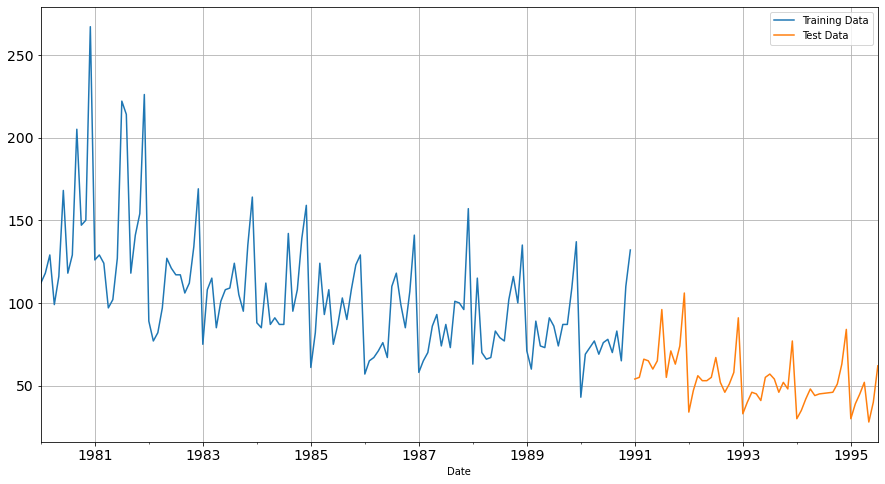

In [40]:
#Plotting Training - Testing Data
train['Rose'].plot(figsize=(15,8), fontsize=14)
test['Rose'].plot(figsize=(15,8), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

## Model 1: Linear Regression

In [41]:
train_time= [ i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]

In [42]:
print("The train time are ",train_time,'\n')
print("The test time are ",test_time)

The train time are  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] 

The test time are  [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [43]:
train_reg=train.copy()
test_reg=test.copy()
train_reg['train_time']=train_time
test_reg['test_time']=test_time

In [44]:
print(train_reg.head())
print(test_reg.head())

             Rose  train_time
Date                         
1980-01-31  112.0           1
1980-02-29  118.0           2
1980-03-31  129.0           3
1980-04-30   99.0           4
1980-05-31  116.0           5
            Rose  test_time
Date                       
1991-01-31  54.0        133
1991-02-28  55.0        134
1991-03-31  66.0        135
1991-04-30  65.0        136
1991-05-31  60.0        137


In [45]:
lr=LinearRegression()

In [46]:
#Fitting Regression model on training dataset
lr=lr.fit(train_reg[['train_time']],train_reg['Rose'])

In [47]:
train_predictions_model1 = lr.predict(train_reg[['train_time']])
train_reg['RegOnTime'] = train_predictions_model1
train_reg.head()

,Rose,train_time,RegOnTime
Date,,,
1980-01-31,112.0,1,137.321144
1980-02-29,118.0,2,136.826766
1980-03-31,129.0,3,136.332388
1980-04-30,99.0,4,135.838010
1980-05-31,116.0,5,135.343632


In [48]:
test_predictions_model1 = lr.predict(test_reg[['test_time']])
test_reg['RegOnTime'] = test_predictions_model1
test_reg.head()

,Rose,test_time,RegOnTime
Date,,,
1991-01-31,54.0,133,72.063266
1991-02-28,55.0,134,71.568888
1991-03-31,66.0,135,71.074511
1991-04-30,65.0,136,70.580133
1991-05-31,60.0,137,70.085755


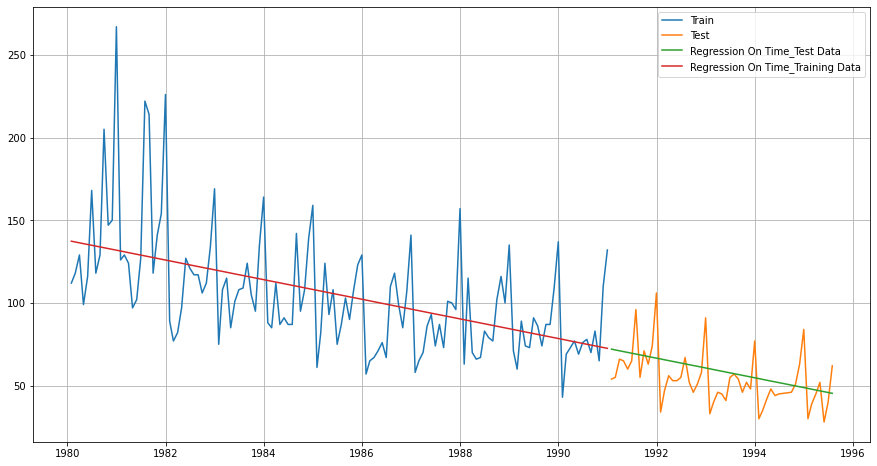

In [49]:
#Plotting Training,Testing and values obtained from regression model.
plt.figure(figsize=(15,8))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(test_reg['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(train_reg['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [50]:
# Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [51]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Rose'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Rose'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 30.718 and MAPE is 21.22


In [52]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Rose'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 and MAPE is 22.82


In [53]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

In [54]:
#In this model the last value of the training dataset is taken as the predicted values
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [55]:
## Let us get the last value (or the most recent value) of the training set.
NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['naive'].head()

Date
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

In [56]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Date
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

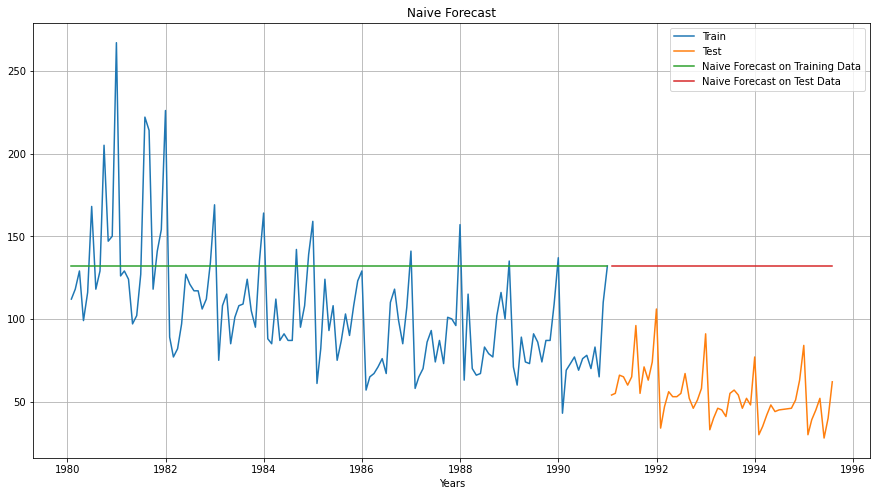

In [57]:
plt.figure(figsize=(15,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.xlabel("Years")
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation 

In [58]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Rose'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 45.064 and MAPE is 36.38


In [175]:
## Test Data - RMSE and MAPE
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Rose'],NaiveModel_test['naive'])
print("For Naive forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For Naive forecast on the Test Data,  RMSE is 79.719 and MAPE is 145.10


In [60]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10


## Method 3: Simple Average

In [61]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [62]:
## Let us get the pedicted values as the mean values of the training set.
SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
SimpleAverage_train.head()

,Rose,mean_forecast
Date,,
1980-01-31,112.0,104.939394
1980-02-29,118.0,104.939394
1980-03-31,129.0,104.939394
1980-04-30,99.0,104.939394
1980-05-31,116.0,104.939394


In [63]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Date,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


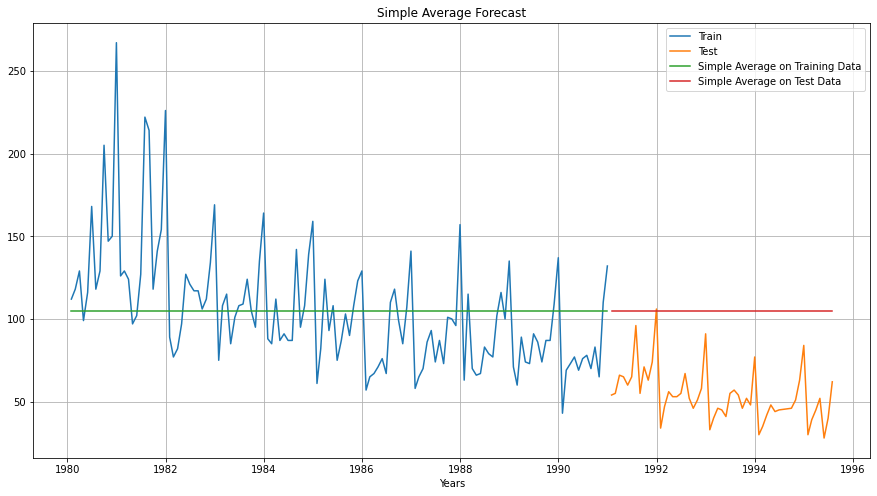

In [64]:
plt.figure(figsize=(15,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.xlabel("Years")
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation of Simple Average

In [65]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Rose'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 36.034 and MAPE is 25.39


In [66]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Rose'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461 and MAPE is 94.93


In [67]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93


## Method 4: Moving Average(MA)

In [68]:
MovingAverage = df1.copy()
MovingAverage.head()

,Rose
Date,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [69]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


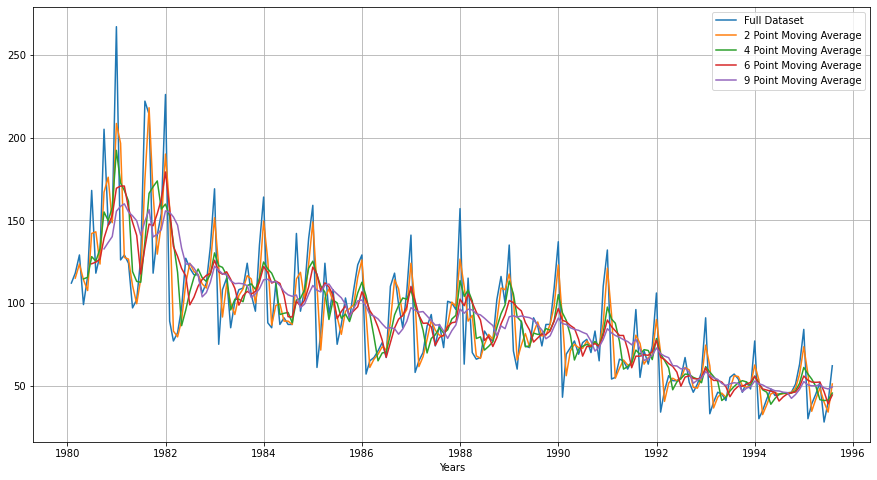

In [70]:
## Plotting on the whole data
plt.figure(figsize=(15,8))
plt.plot(MovingAverage['Rose'], label='Full Dataset')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.xlabel("Years")
plt.legend(loc = 'best')
plt.grid();

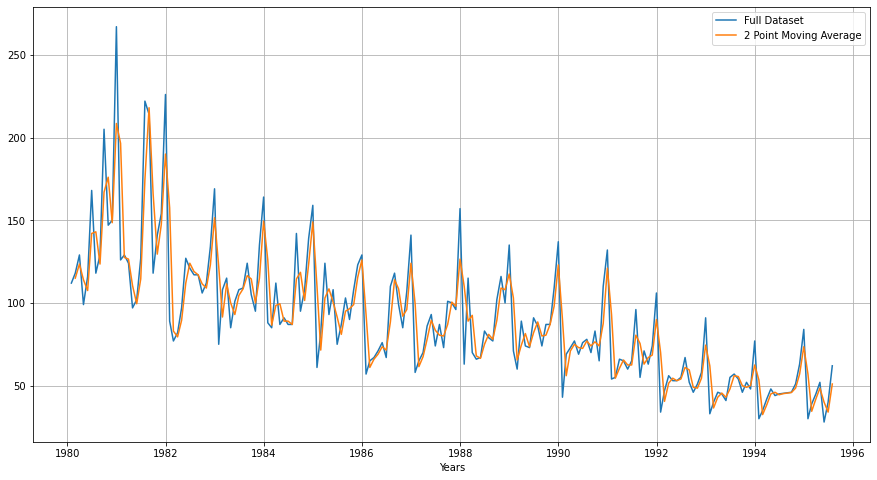

In [71]:
## Plotting on the whole data
plt.figure(figsize=(15,8))
plt.plot(MovingAverage['Rose'], label='Full Dataset')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.xlabel("Years")
plt.legend(loc = 'best')
plt.grid();

In [72]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

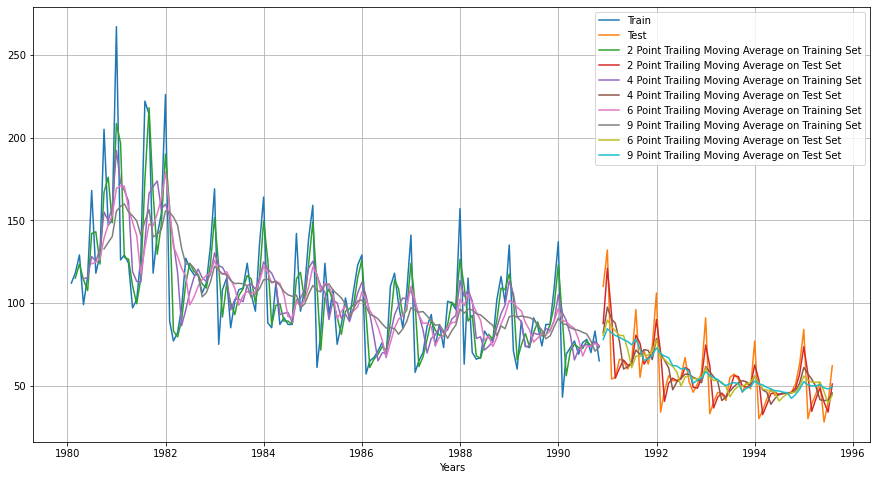

In [73]:
## Plotting on both the Training and Test data
plt.figure(figsize=(15,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')

plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')

plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.xlabel("Years")
plt.legend(loc='best')
plt.grid()

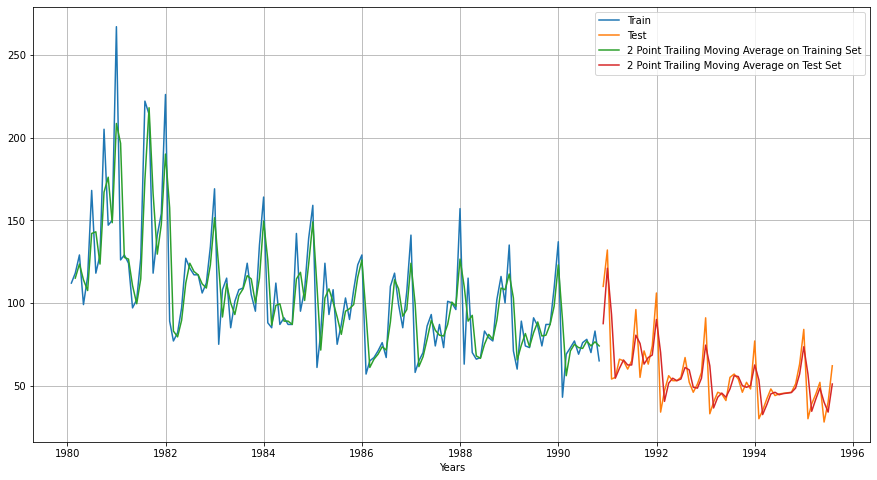

In [74]:
## Plotting on both the Training and Test data
plt.figure(figsize=(15,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.xlabel("Years")
plt.legend(loc='best')
plt.grid()

In [75]:
trailing_MovingAverage_test.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1990-11-30,110.0,87.5,82.00,80.333333,77.888889
1990-12-31,132.0,121.0,97.50,89.666667,84.444444
1991-01-31,54.0,93.0,90.25,85.666667,81.888889
1991-02-28,55.0,54.5,87.75,83.166667,80.333333
1991-03-31,66.0,60.5,76.75,80.333333,79.222222


In [76]:
trailing_MovingAverage_test.shape

(57, 5)

In [77]:
test.head()

,Rose
Date,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


In [78]:
test.shape

(55, 1)

### Model Evaluation on moving average

In [79]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'][2:],squared=False)
mape_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_2'][2:])
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))## Test Data - RMSE and MAPE --> 4 point Trailing MA

## Test Data - RMSE and MAPE --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'][2:],squared=False)
mape_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_4'][2:])
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'][2:],squared=False)
mape_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_6'][2:])
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'][2:],squared=False)
mape_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'][2:])
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 11.529 and MAPE is 13.54
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 14.451 and MAPE is 19.49
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 14.566 and MAPE is 20.82
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 14.728 and MAPE is 21.01


In [80]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01


### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

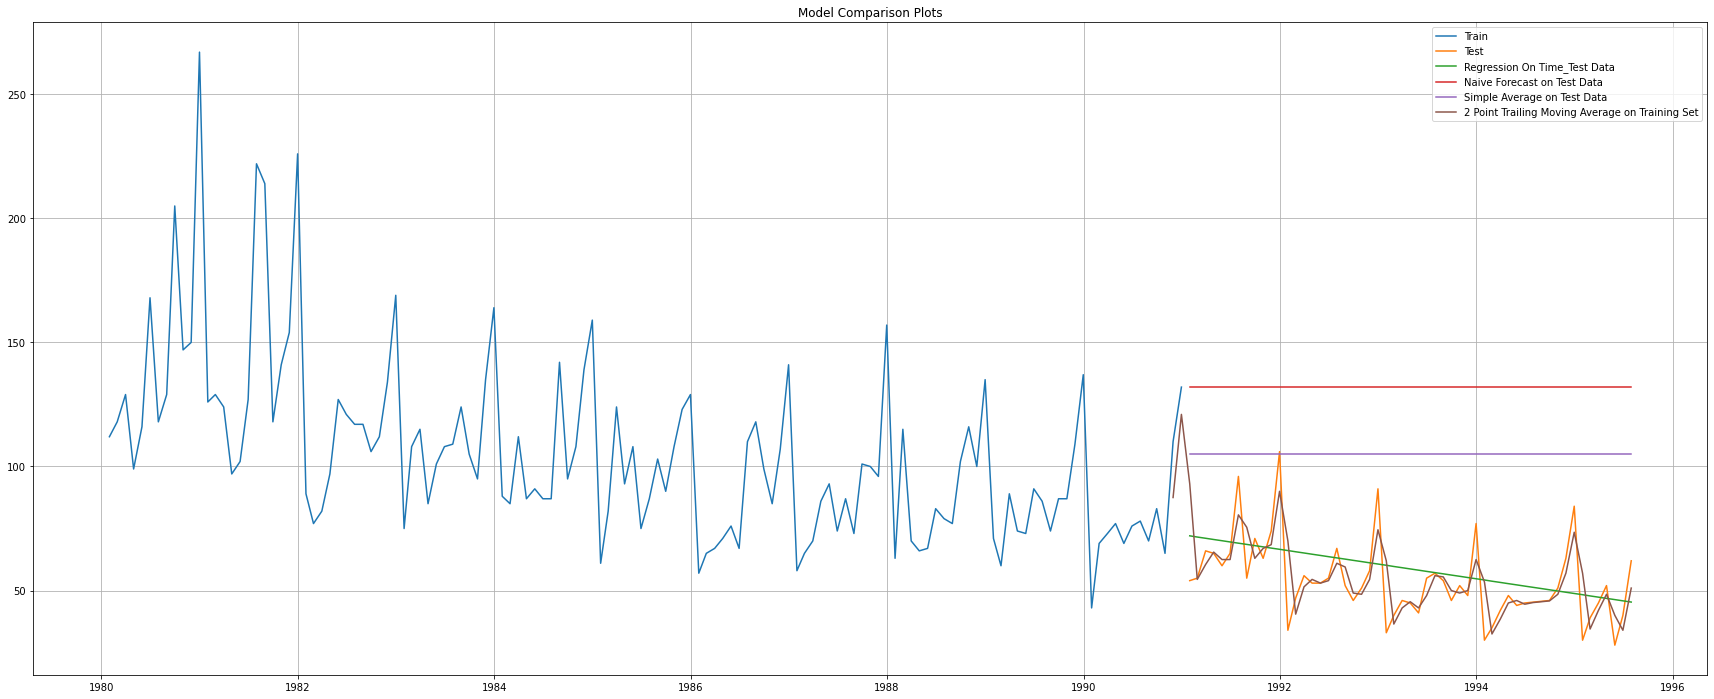

In [81]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(test_reg['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [82]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [83]:
SES_train = train.copy()
SES_test = test.copy()

In [84]:
model_SES = SimpleExpSmoothing(SES_train['Rose'].astype('double'))

In [85]:
model_SES_autofit = model_SES.fit(optimized=True)

In [86]:
model_SES.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [87]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
Date,,
1991-01-31,54.0,87.104983
1991-02-28,55.0,87.104983
1991-03-31,66.0,87.104983
1991-04-30,65.0,87.104983
1991-05-31,60.0,87.104983


In [88]:
print('Smoothing Level', np.round(model_SES.params['smoothing_level'], 4))
print('Initial Level', np.round(model_SES.params['initial_level'], 4))

Smoothing Level 0.0987
Initial Level 134.3872


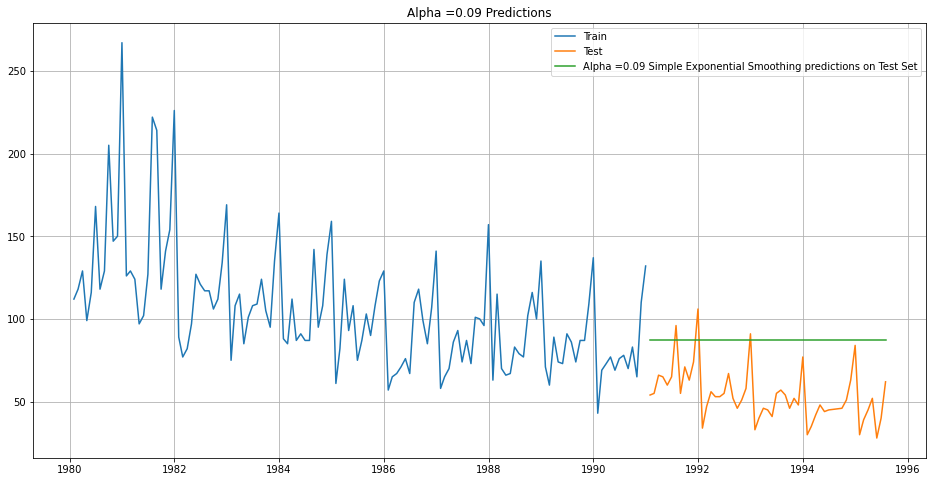

In [89]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.09 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.09 Predictions');

### Model Evaluation for  𝛼  = 0.09 : Simple Exponential Smoothing

In [90]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Rose'],SES_test['predict'])
print("For Alpha =0.09 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))

For Alpha =0.09 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 36.796 and MAPE is 63.88


In [91]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha =0.09 Simple Exponential Smoothing Model'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
Alpha =0.09 Simple Exponential Smoothing Model,36.796227,63.88


#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [92]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': [],'Test MAPE':[]})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE,Test MAPE


In [93]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'].astype('double'),SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'].astype('double'),SES_test['predict',i],squared=False)
    
    mape_model5_test_i = MAPE(SES_test['Rose'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i,'Test MAPE':mape_model5_test_i}, ignore_index=True)

In [94]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE,Test MAPE
0,0.3,32.470164,47.504821,83.71
1,0.4,33.035130,53.767406,95.50
2,0.5,33.682839,59.641786,106.81
3,0.6,34.441171,64.971288,117.04
4,0.7,35.323261,69.698162,126.07
5,0.8,36.334596,73.773992,133.83
6,0.9,37.482782,77.139276,140.22


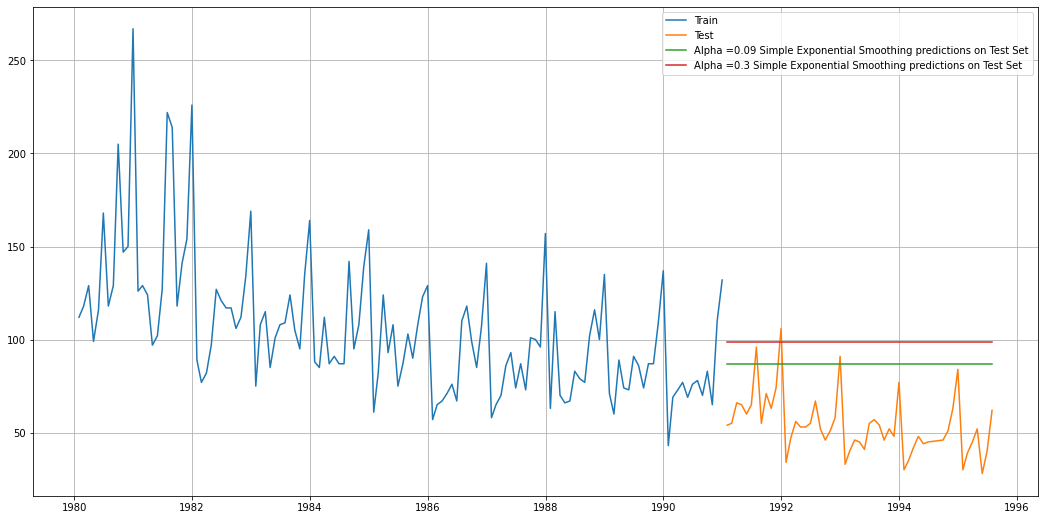

In [95]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.09 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [96]:
DES_train = train.copy()
DES_test = test.copy()

In [97]:
model_DES = Holt(DES_train['Rose'])

In [98]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE,Test MAPE


In [99]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        mape_model6_test_i = MAPE(DES_test['Rose'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test,'Test MAPE':mape_model6_test_i}, ignore_index=True)

In [100]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE,Test MAPE
0,0.3,0.3,35.944983,265.567594,442.50
1,0.3,0.4,37.393239,358.750942,593.91
2,0.3,0.5,38.888325,451.810230,745.22
3,0.3,0.6,40.280670,536.954148,883.91
4,0.3,0.7,41.403518,601.616351,989.57
...,...,...,...,...,...
59,1.0,0.6,51.831610,801.680218,1323.85
60,1.0,0.7,54.497039,841.892573,1388.87
61,1.0,0.8,57.365879,853.965537,1408.39
62,1.0,0.9,60.474309,834.710935,1377.26


In [101]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE,Test MAPE
0,0.3,0.3,35.944983,265.567594,442.50
8,0.4,0.3,36.749123,339.306534,565.42
1,0.3,0.4,37.393239,358.750942,593.91
16,0.5,0.3,37.433314,394.272629,657.17
24,0.6,0.3,38.348984,439.296033,732.29


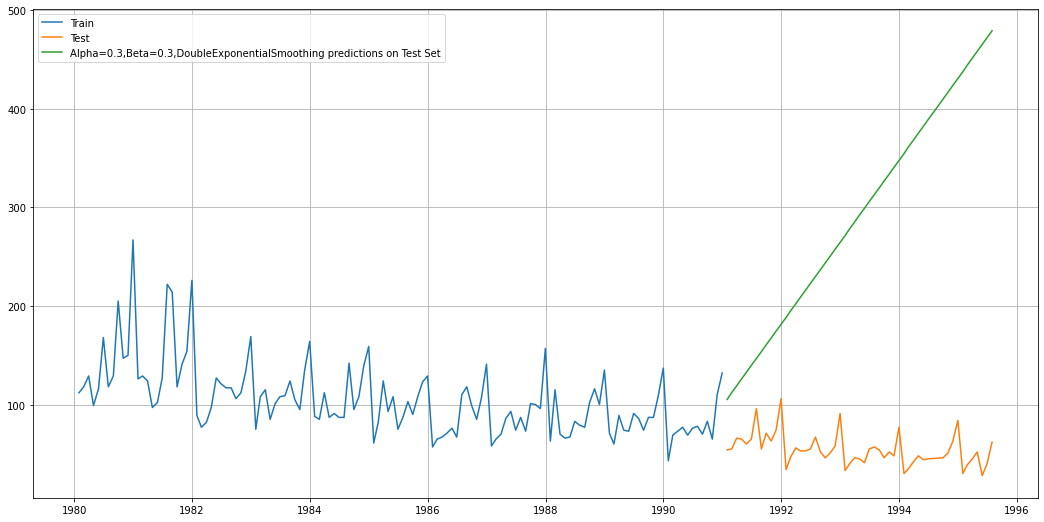

In [102]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [103]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[resultsDf_7.sort_values(by=['Test MAPE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
Alpha =0.09 Simple Exponential Smoothing Model,36.796227,63.88
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594,442.50


## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [104]:
TES_train = train.copy()
TES_test = test.copy()

In [105]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive',freq='M')

In [106]:
model_TES_autofit = model_TES.fit()

In [107]:
model_TES_autofit.params

{'smoothing_level': 0.08485622209289158,
 'smoothing_trend': 0.0005280630369796539,
 'smoothing_seasonal': 0.006764526794519119,
 'damping_trend': nan,
 'initial_level': 77.31958915163194,
 'initial_trend': -0.5501794952033382,
 'initial_seasons': array([ 38.63205024,  50.94041582,  59.06227683,  48.26306762,
         57.05566819,  62.6629802 ,  72.54958097,  78.56552615,
         74.62626287,  72.65336605,  90.54607132, 133.36580632]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [108]:
## Prediction on the training data
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Rose,auto_predict
Date,,
1980-01-31,112.0,115.401460
1980-02-29,118.0,126.870859
1980-03-31,129.0,133.689243
1980-04-30,99.0,121.941182
1980-05-31,116.0,128.235113


In [109]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test['Rose']))
TES_test.head()

,Rose,auto_predict
Date,,
1991-01-31,54.0,42.605820
1991-02-28,55.0,54.376558
1991-03-31,66.0,61.934184
1991-04-30,65.0,50.608812
1991-05-31,60.0,58.838643


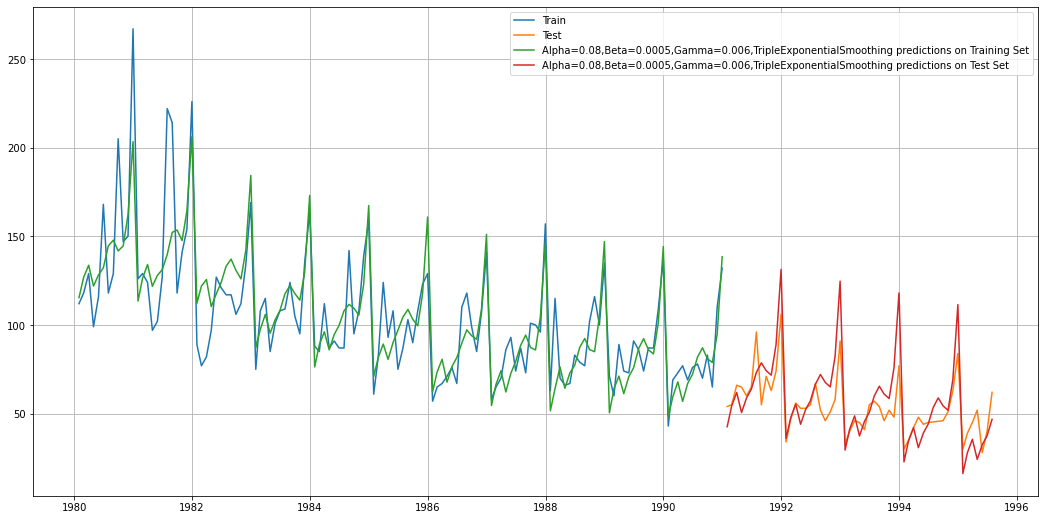

In [110]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_train['auto_predict'], label='Alpha=0.08,Beta=0.0005,Gamma=0.006,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.08,Beta=0.0005,Gamma=0.006,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [111]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Rose'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Rose'],TES_train['auto_predict'])
print("For Alpha: 0.08,Beta: 0.0005 and Gamma:0.006, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1,mape_model6_train_1))

For Alpha: 0.08,Beta: 0.0005 and Gamma:0.006, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 19.542 MAPE is 13.37


In [112]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Rose'],TES_test['auto_predict'])
print("For Alpha: 0.08,Beta: 0.0005 and Gamma:0.006,Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1,mape_model6_test_1))

For Alpha: 0.08,Beta: 0.0005 and Gamma:0.006,Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 14.257 MAPE is 19.23


In [113]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.08,Beta=0.0005,Gamma=0.006,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
Alpha =0.09 Simple Exponential Smoothing Model,36.796227,63.88
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594,442.50
"Alpha=0.08,Beta=0.0005,Gamma=0.006,TripleExponentialSmoothing",14.257122,19.23


In [114]:
#resultsDf.drop("Alpha=0.08,Beta=0.0005,Gamma=0.006,TripleExponentialSmoothing",inplace=True)

### With iterations

In [115]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Test MAPE


In [116]:

for i in np.arange(0.03,1.1,0.1):
    for j in np.arange(0.03,1.1,0.1):
        for k in np.arange(0.03,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test['Rose']))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Rose'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Rose'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [117]:
resultsDf_8_2.head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Test MAPE,Train MAPE
0,0.03,0.03,0.03,34.140740,29.131665,40.36,22.82
1,0.03,0.03,0.13,28.149271,17.416031,23.00,17.70
2,0.03,0.03,0.23,25.613232,15.534640,21.71,16.05
3,0.03,0.03,0.33,24.448093,16.012742,23.64,15.48
4,0.03,0.03,0.43,23.928723,16.794989,25.28,15.27


In [118]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Test MAPE,Train MAPE
69,0.03,0.63,0.33,25.535373,11.738751,15.91,17.41
103,0.03,0.93,0.43,25.037857,12.098599,16.63,16.11
60,0.03,0.53,0.53,24.736960,12.190767,16.49,16.35
146,0.13,0.23,0.33,24.213698,12.208482,16.47,15.80
61,0.03,0.53,0.63,24.887581,12.234972,16.15,16.21


In [119]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Test MAPE,Train MAPE
69,0.03,0.63,0.33,25.535373,11.738751,15.91,17.41
61,0.03,0.53,0.63,24.887581,12.234972,16.15,16.21
94,0.03,0.83,0.63,25.348643,12.306139,16.35,16.06
70,0.03,0.63,0.43,25.006252,12.306770,16.39,16.79
146,0.13,0.23,0.33,24.213698,12.208482,16.47,15.80


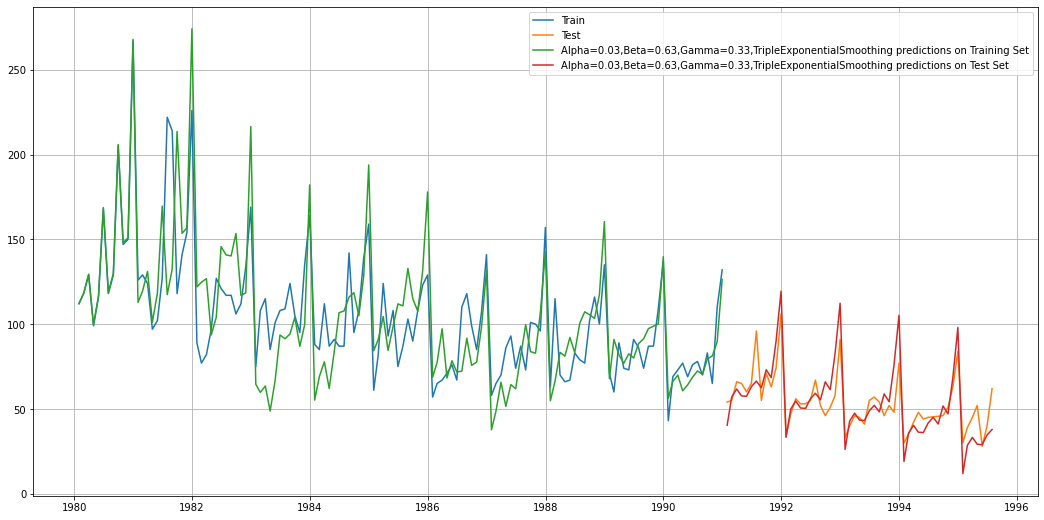

In [120]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_train['predict', 0.03, 0.6300000000000001, 0.33000000000000007], label='Alpha=0.03,Beta=0.63,Gamma=0.33,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.03, 0.6300000000000001, 0.33000000000000007], label='Alpha=0.03,Beta=0.63,Gamma=0.33,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [121]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][3]],'Test MAPE':[resultsDf_8_2['Test MAPE'][3]]}
                           ,index=['Alpha=0.03,Beta=0.63,Gamma=0.33,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
Alpha =0.09 Simple Exponential Smoothing Model,36.796227,63.88
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594,442.50
"Alpha=0.08,Beta=0.0005,Gamma=0.006,TripleExponentialSmoothing",14.257122,19.23


In [122]:
#resultsDf.drop("Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponentialSmoothing",inplace=True)

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.


## Check for stationarity of the Whole Data Time Series.

### Test the data for stationarity using the Augmented Dickey-Fuller (ADF) test at α = 0.05.
### If the data is non-stationary, use appropriate measures to stationarize the data and then check for stationarity using the Augmented Dickey-Fuller (ADF) Test at α = 0.05.
### The Augmented Dickey Fuller Test (ADF) is unit root test for stationarity. The null hypothesis is that time series is non-stationary. Alternative hypothesis is that time series is stationary.

In [123]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [124]:
adfuller(df1['Rose'], autolag='AIC')

(-1.8766991079908288,
 0.3431007142833732,
 13,
 173,
 {'1%': -3.4687256239864017,
  '5%': -2.8783961376954363,
  '10%': -2.57575634100705},
 1516.2583629826856)

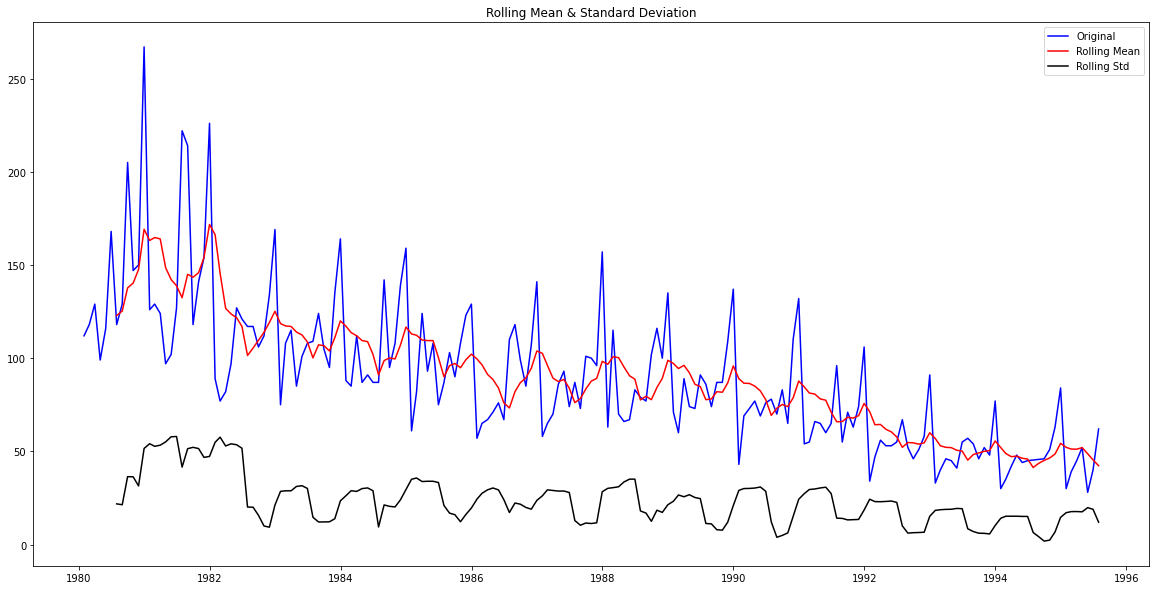

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [125]:
plt.figure(figsize=(20,10))
test_stationarity(df1['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

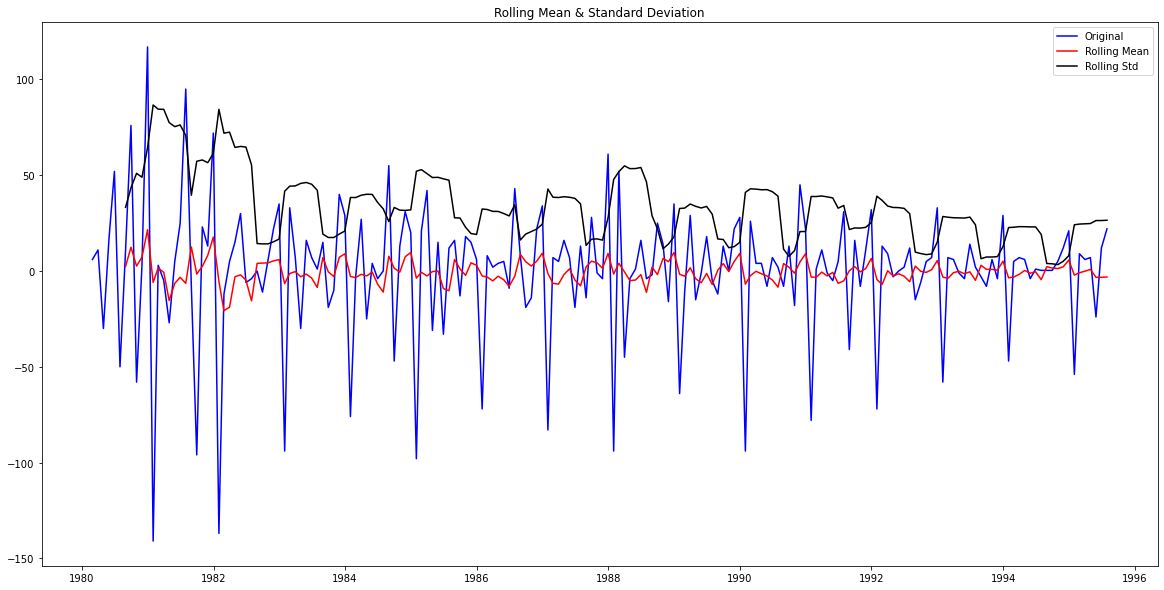

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [126]:
plt.figure(figsize=(20,10))
test_stationarity(df1['Rose'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

<Figure size 1080x576 with 0 Axes>

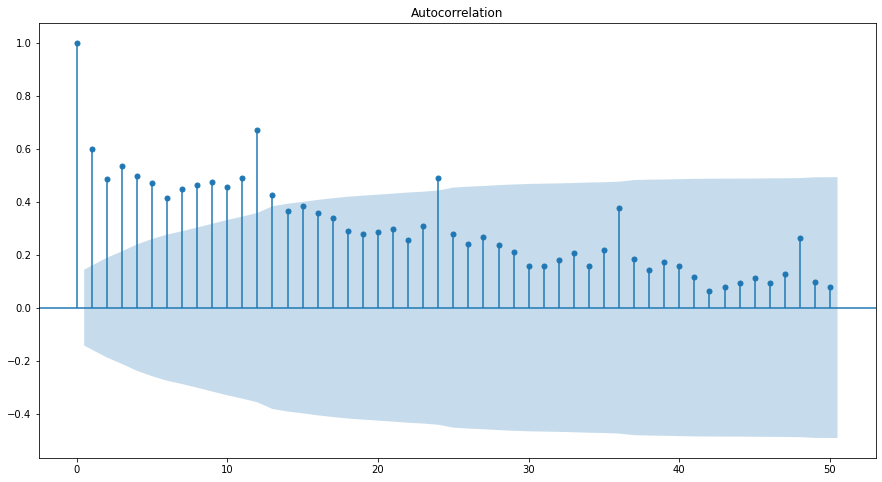

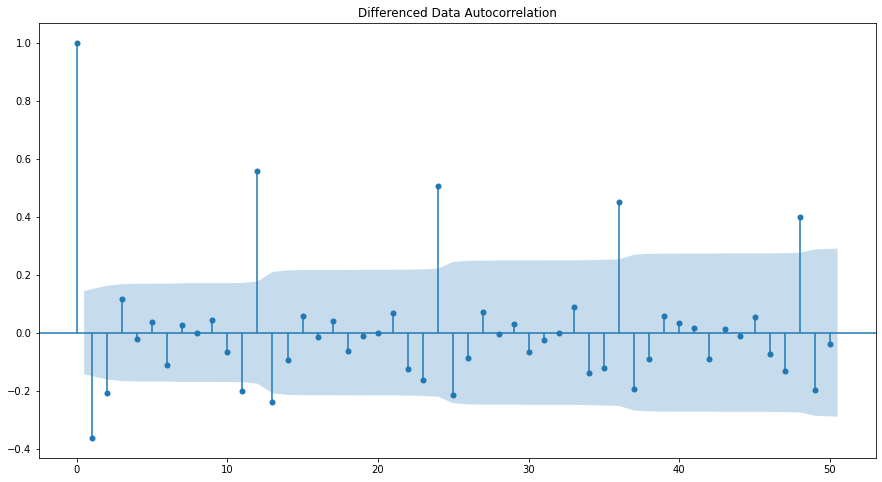

In [127]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15,8))
plot_acf(df1['Rose'],lags=50)
plot_acf(df1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

<Figure size 1440x720 with 0 Axes>

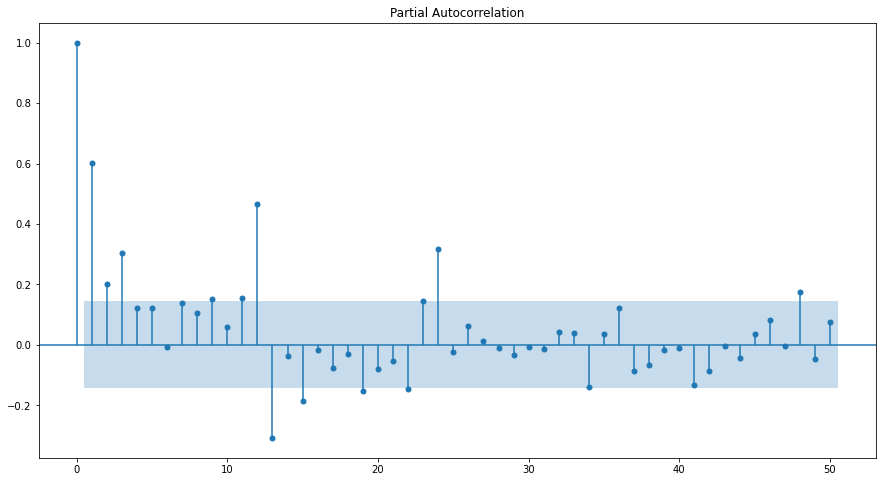

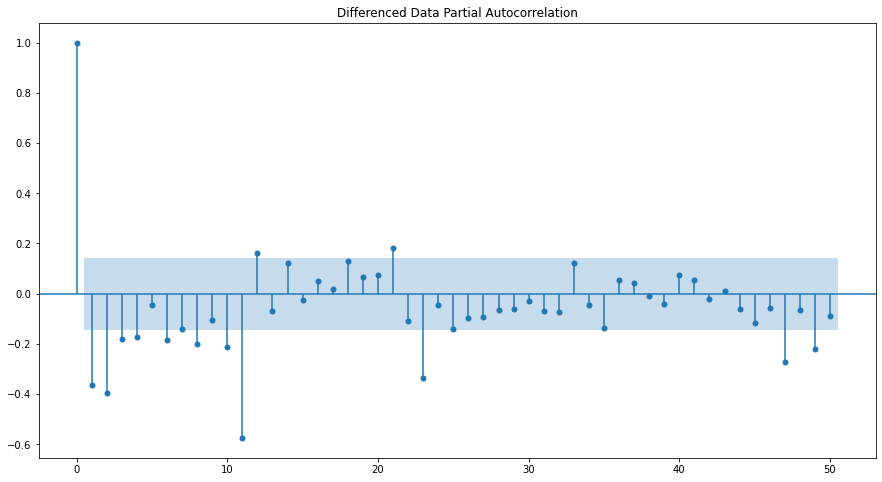

In [128]:
plt.figure(figsize=(20,10))
plot_pacf(df1['Rose'],lags=50)
plot_pacf(df1['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 4.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

By looking at the above plots, we can say that both the PACF plot cuts-off at lag 1 and ACF plot cuts-off at lag 2.
From the above plots, we can say that there seems to be a seasonality of 12 months in the dataset.

## Check for stationarity of the Training Data Time Series.

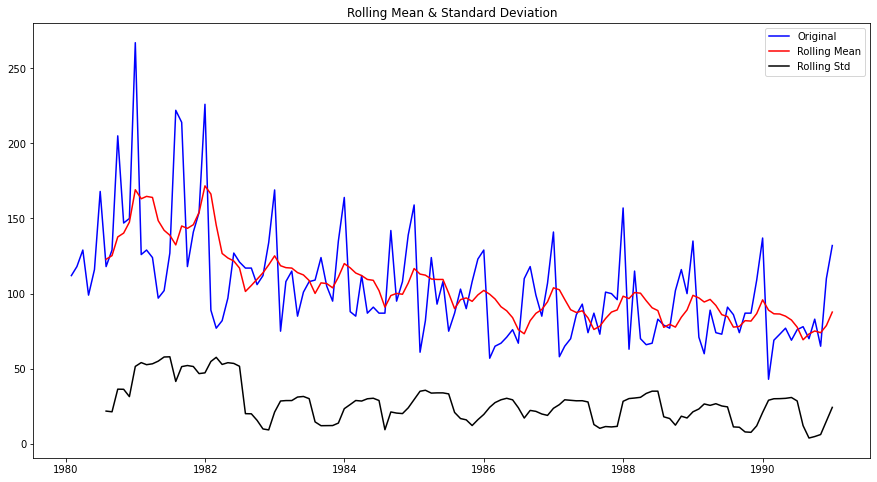

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [129]:
plt.figure(figsize=(15,8))
test_stationarity(train['Rose'])

We see that the series is not stationary at $\alpha$ = 0.05.

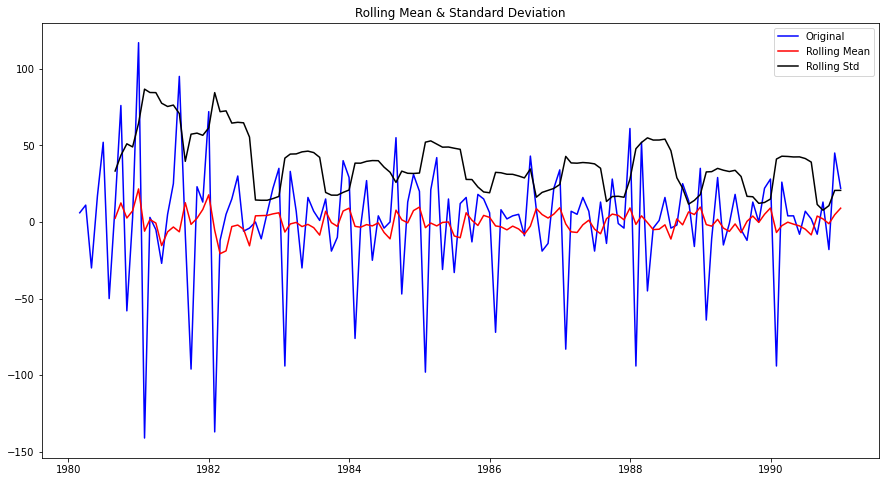

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [130]:
plt.figure(figsize=(15,8))
test_stationarity((train['Rose']).diff(1).dropna())

We see that after taking a difference of order 1 the series have become stationary at 𝛼 = 0.05.

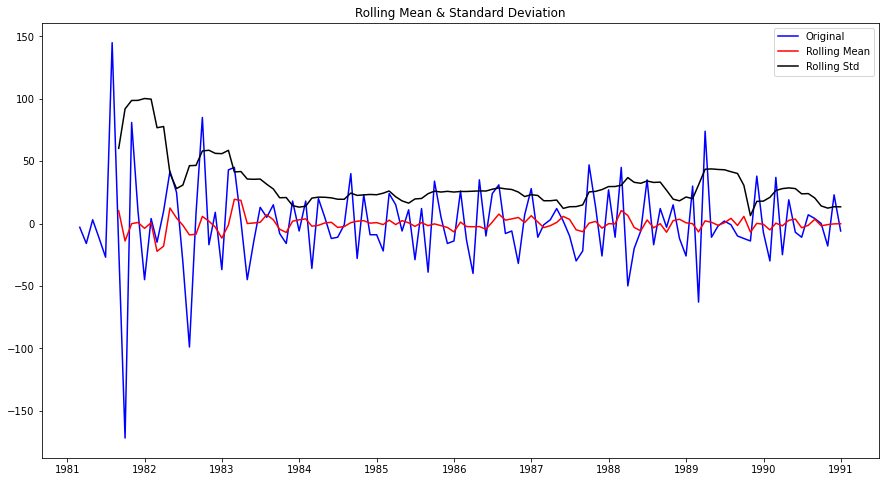

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [131]:
plt.figure(figsize=(15,8))
test_stationarity((train['Rose'].diff(12).dropna()).diff(1).dropna())

We see that after taking a difference of order 1 the series have become stationary at 𝛼 = 0.05.
And I have also taken seasonality of 12 into account from the original dataset.

Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there

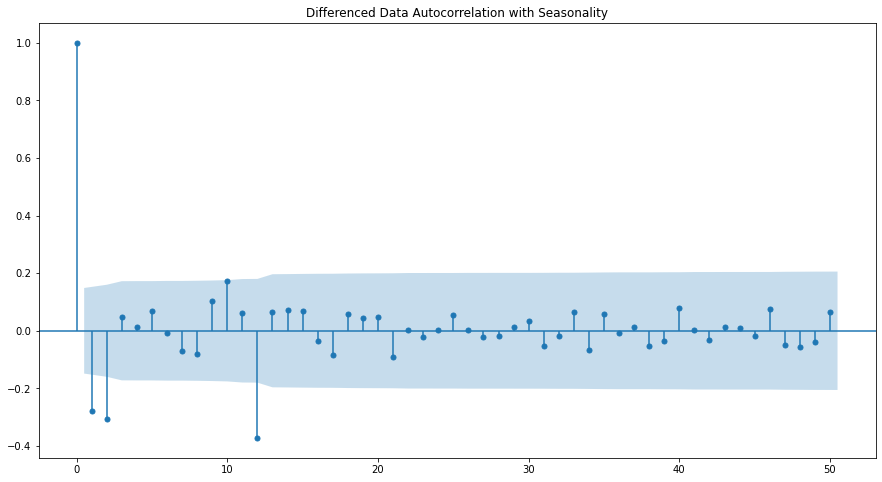

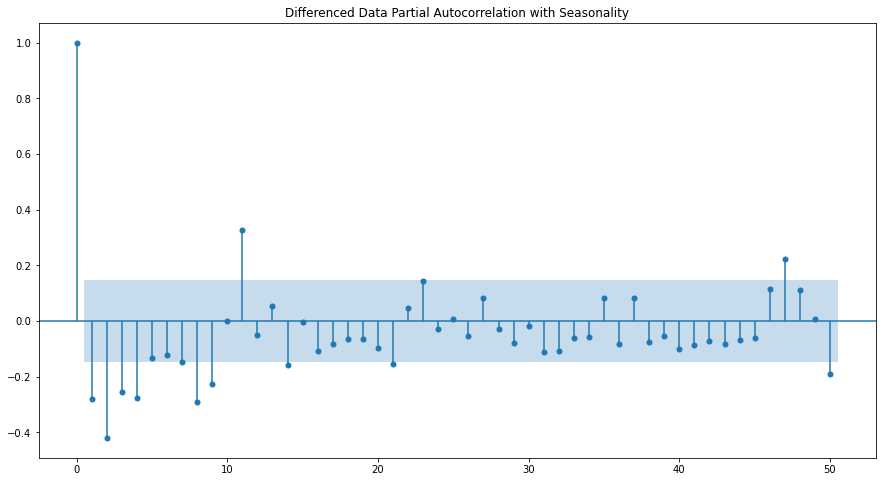

In [132]:
plot_acf((df1['Rose'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation with Seasonality')
plot_pacf((df1['Rose'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation with Seasonality');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We will keep the p=4 and q=2 parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 2.
Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period).

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

#### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there

### 1.Automated version of ARIMA for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [133]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 5 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [134]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [135]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    try:
        ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
        print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
        ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    except:
        continue

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046448
ARIMA(0, 1, 2) - AIC:1276.8353734911866
ARIMA(0, 1, 3) - AIC:1278.0742599150858
ARIMA(0, 1, 4) - AIC:1278.8383582684091
ARIMA(1, 1, 0) - AIC:1319.3483105802602
ARIMA(1, 1, 1) - AIC:1277.775747704015
ARIMA(1, 1, 2) - AIC:1277.3592227764138
ARIMA(1, 1, 3) - AIC:1279.3126383073027
ARIMA(1, 1, 4) - AIC:1281.8925079870467
ARIMA(2, 1, 0) - AIC:1300.6092611744193
ARIMA(2, 1, 1) - AIC:1279.0456894093204
ARIMA(2, 1, 2) - AIC:1279.2986939365765
ARIMA(2, 1, 3) - AIC:1281.1962260422922
ARIMA(2, 1, 4) - AIC:1282.4166848732598
ARIMA(3, 1, 0) - AIC:1299.4787391543089
ARIMA(3, 1, 1) - AIC:1279.6059627028667
ARIMA(3, 1, 2) - AIC:1280.9692487563702
ARIMA(3, 1, 3) - AIC:1273.194238485722
ARIMA(3, 1, 4) - AIC:1274.337930312492
ARIMA(4, 1, 0) - AIC:1298.3195533735543
ARIMA(4, 1, 1) - AIC:1281.1163245052849
ARIMA(4, 1, 2) - AIC:1283.752727854786
ARIMA(4, 1, 3) - AIC:1284.9526869792026
ARIMA(4, 1, 4) - AIC:1284.7721579982854


In [136]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
18,"(3, 1, 3)",1273.194238
19,"(3, 1, 4)",1274.337930
2,"(0, 1, 2)",1276.835373
7,"(1, 1, 2)",1277.359223
6,"(1, 1, 1)",1277.775748
3,"(0, 1, 3)",1278.074260
4,"(0, 1, 4)",1278.838358
11,"(2, 1, 1)",1279.045689
12,"(2, 1, 2)",1279.298694
8,"(1, 1, 3)",1279.312638


In [137]:
mod = ARIMA(train['Rose'], order=(3,1,3),freq='M')

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Sun, 20 Mar 2022   AIC                           1273.194
Time:                        23:17:26   BIC                           1296.196
Sample:                    02-29-1980   HQIC                          1282.541
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.546      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7241      0.086     -8.379      0.000      -0.893      -0.555
ar.L2.D.Rose    -0.7215      0.087     -8.30

### Prediction on the Test Set using Auto ARIMA model and evaluation

In [138]:
predicted_arima = results_Arima.forecast(steps=len(test))

In [139]:
test_rmse_arima = metrics.mean_squared_error(test['Rose'],predicted_arima[0],squared=False)
test_mape_arima= MAPE(test['Rose'],predicted_arima[0])
print("Test rmse for arima is ",test_rmse_arima)
print("Test mape for arima is ",test_mape_arima)

Test rmse for arima is  15.989214539681338
Test mape for arima is  26.09


In [140]:
resultsDf_9 = pd.DataFrame({'Test RMSE': test_rmse_arima,'Test MAPE':test_mape_arima}
                           ,index=['ARIMA (3,1,3)'])
resultsDf_9

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
Alpha =0.09 Simple Exponential Smoothing Model,36.796227,63.88
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594,442.50
"Alpha=0.08,Beta=0.0005,Gamma=0.006,TripleExponentialSmoothing",14.257122,19.23


### 2. Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [142]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 4
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [143]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [144]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.42308272074
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.437529638091
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.020786938645
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752289
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697561
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945758
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918325
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383863
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330946335
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483303776
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461675
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988264769541
SARIMA(0, 1, 2)x(0, 0, 0, 

In [145]:
SARIMA_AIC.sort_values(by=['AIC']).head()  

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
53,"(1, 1, 2)","(2, 0, 2, 12)",896.686920
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [148]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 20 Mar 2022   AIC                            887.938
Time:                                    23:18:41   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.826     -0.004      0.996    -372.895     371.209
ma.L2         -0.1573     29.823   

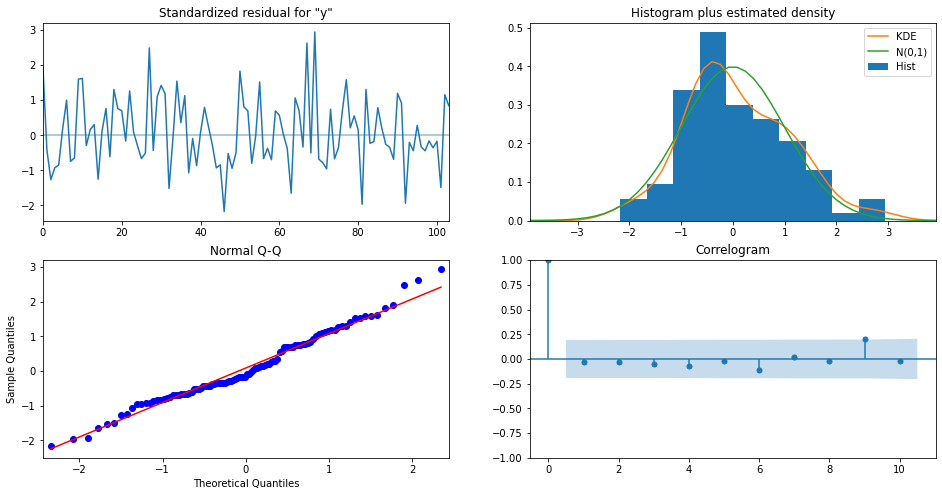

In [149]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

### Prediction on the Test Set using Auto SARIMA model and evaluation

In [150]:
pred_test_SARIMA = results_SARIMA.get_forecast(steps=len(test))
pred_test_SARIMA.predicted_mean

array([ 62.86726335,  70.54118998,  77.35641057,  76.20881375,
        72.74739775,  79.2308653 ,  79.2176542 ,  73.2620952 ,
        82.07394635,  74.6727163 ,  97.77998492, 113.97566437,
        63.85264132,  72.74762029,  76.28626643,  76.30908244,
        73.26798985,  77.87565415,  78.17510662,  73.87057984,
        80.6803957 ,  74.16637773,  92.98112904, 105.1152727 ,
        67.85648982,  73.41236885,  76.69969537,  76.36065043,
        74.25979106,  77.81745198,  77.91727952,  74.62432162,
        79.64942474,  75.15335229,  88.66259094,  97.76603381,
        69.69442617,  74.30991527,  76.51949434,  76.40884376,
        74.76104526,  77.38754915,  77.51269396,  75.06961215,
        78.87066679,  75.34245896,  85.71448373,  92.53923463,
        71.54213995,  74.82207398,  76.58201057,  76.44114329,
        75.23468597,  77.22090328,  77.29447269])

In [151]:
pred_test_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867263,15.928501,31.647976,94.086551
1,70.541190,16.147659,38.892360,102.190019
2,77.356411,16.147656,45.707586,109.005235
3,76.208814,16.147656,44.559989,107.857639
4,72.747398,16.147656,41.098573,104.396223


In [152]:
test_rmse_sarima = metrics.mean_squared_error(test['Rose'],pred_test_SARIMA.predicted_mean,squared=False)
test_mape_sarima= MAPE(test['Rose'],pred_test_SARIMA.predicted_mean)
print("Test rmse for SARIMA is ",test_rmse_sarima)
print("Test mape for SARIMA is ",test_mape_sarima)

Test rmse for SARIMA is  26.928361739818897
Test mape for SARIMA is  46.6


In [153]:
resultsDf_10 = pd.DataFrame({'Test RMSE': test_rmse_sarima,'Test MAPE':test_mape_sarima}
                           ,index=['SARIMA(0, 1, 2)(2, 0, 2, 12)'])
resultsDf_10

resultsDf = pd.concat([resultsDf,resultsDf_10])

resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
Alpha =0.09 Simple Exponential Smoothing Model,36.796227,63.88
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594,442.50
"Alpha=0.08,Beta=0.0005,Gamma=0.006,TripleExponentialSmoothing",14.257122,19.23


# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### 1. Manual ARIMA Model

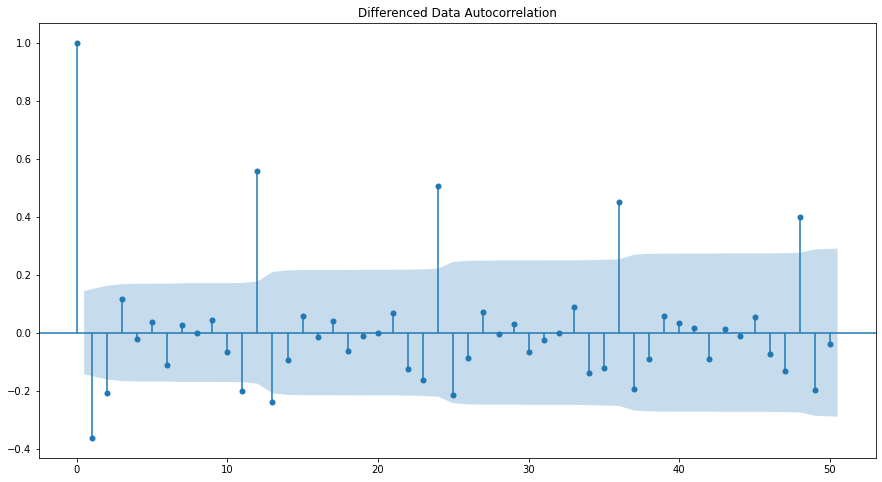

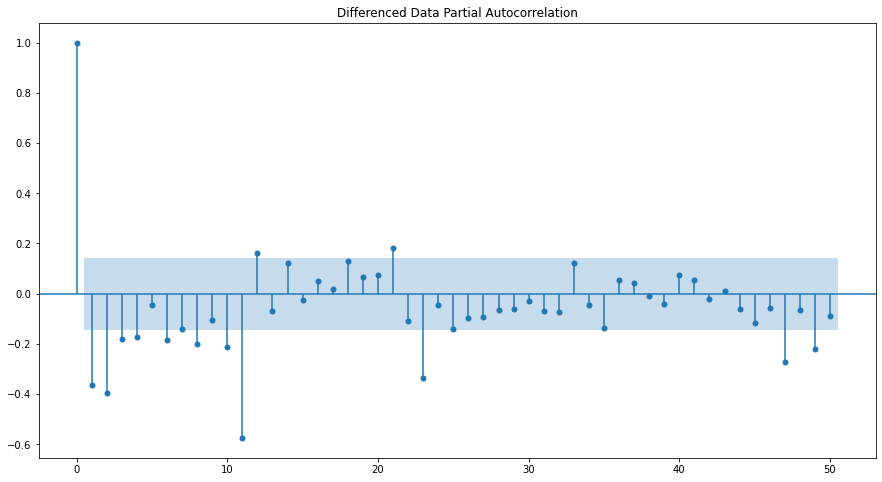

In [154]:
plot_acf(df1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [155]:
mod_new = ARIMA(train['Rose'].astype('float64'), order=(1,1,2),freq='M')
# if some value is in decimal, float will prevent it from getting rounded off, hence providing better forecast keeping the original values intact
#most of time, if you take p=q=0, convert to float
results_Arima_new = mod_new.fit()

print(results_Arima_new.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -633.680
Method:                       css-mle   S.D. of innovations             29.977
Date:                Sun, 20 Mar 2022   AIC                           1277.359
Time:                        23:18:58   BIC                           1291.735
Sample:                    02-29-1980   HQIC                          1283.201
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4921      0.079     -6.224      0.000      -0.647      -0.337
ar.L1.D.Rose    -0.4163      0.222     -1.874      0.061      -0.852       0.019
ma.L1.D.Rose    -0.3616      0.189     -1.91

In [156]:
predicted_arima_manual = results_Arima_new.forecast(steps=len(test))

In [157]:
test_rmse_arima_new = metrics.mean_squared_error(test['Rose'],predicted_arima_manual[0],squared=False)
test_mape_arima_new= MAPE(test['Rose'],predicted_arima_manual[0])
print("Test rmse for Manual arima is ",test_rmse_arima_new)
print("Test mape for Manual arima is ",test_mape_arima_new)

Test rmse for Manual arima is  15.284561918351923
Test mape for Manual arima is  22.63


In [158]:
resultsDf_12 = pd.DataFrame({'Test RMSE': test_rmse_arima_new,'Test MAPE':test_mape_arima_new}
                           ,index=['ARIMA(1,1,2)'])
resultsDf_12

,Test RMSE,Test MAPE
"ARIMA(1,1,2)",15.284562,22.63


In [159]:
resultsDf = pd.concat([resultsDf,resultsDf_12])

resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
Alpha =0.09 Simple Exponential Smoothing Model,36.796227,63.88
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594,442.50
"Alpha=0.08,Beta=0.0005,Gamma=0.006,TripleExponentialSmoothing",14.257122,19.23


### Manual SARIMA

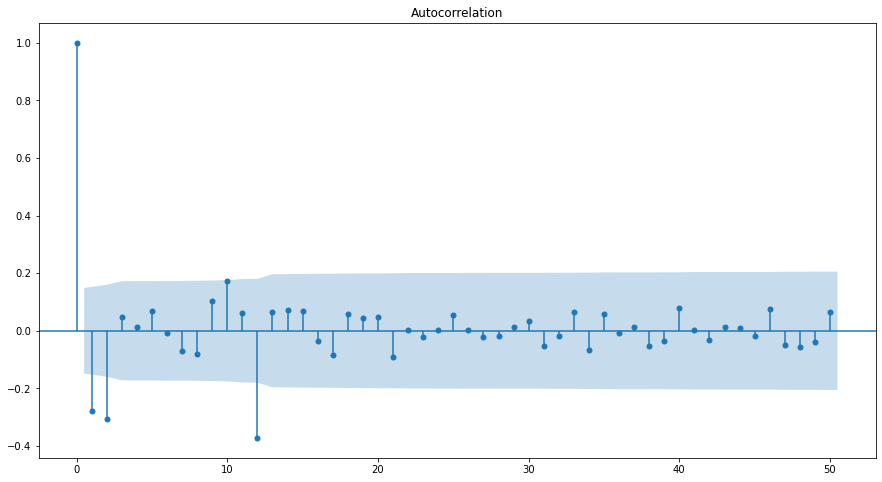

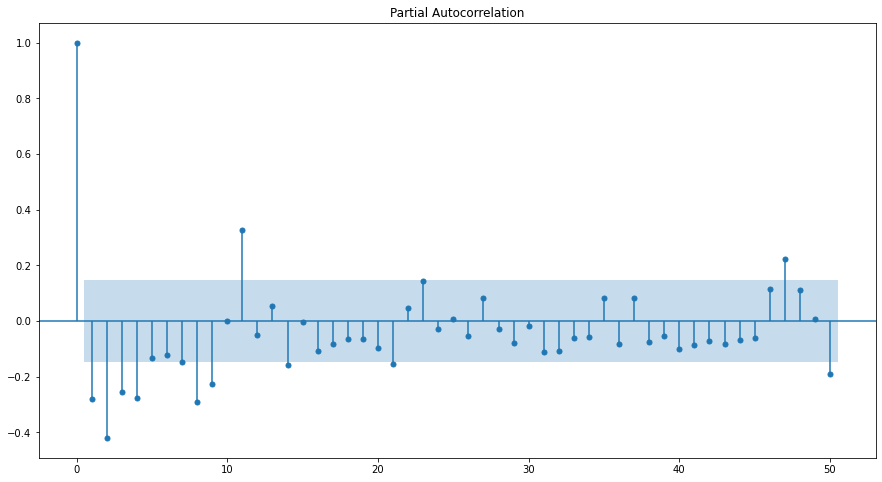

In [160]:
plot_acf((df1['Rose'].diff(12).dropna()).diff().dropna(),lags=50)
plot_pacf((df1['Rose'].diff(12).dropna()).diff().dropna(),lags=50);

In [161]:
import statsmodels.api as sm

mod_sar = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_new = mod_sar.fit(maxiter=1000)
print(results_SARIMA_new.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Sun, 20 Mar 2022   AIC                            786.737
Time:                                    23:19:05   BIC                            809.433
Sample:                                         0   HQIC                           795.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.132     -6.814      0.000      -1.155      -0.639
ar.L2          0.0165      0.171   

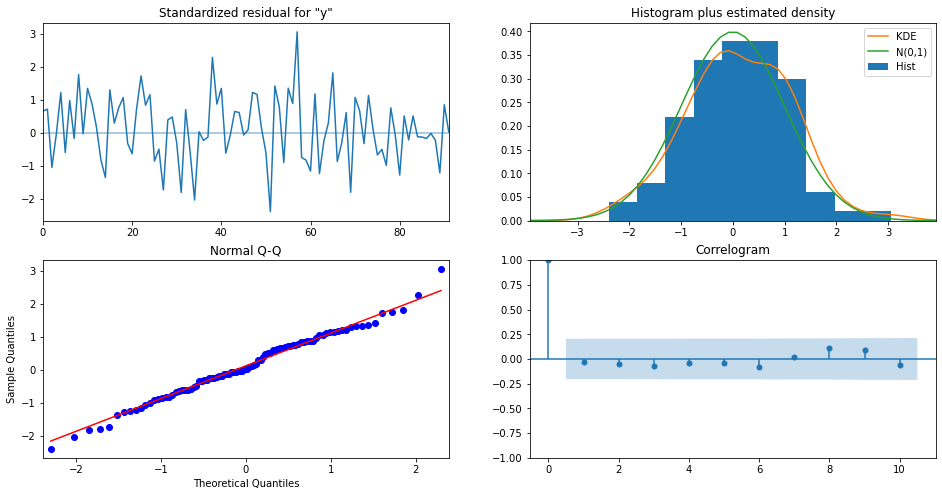

In [162]:
results_SARIMA_new.plot_diagnostics(figsize=(16, 8))
plt.show()

In [163]:
pred_test_SARIMA_new = results_SARIMA_new.get_forecast(steps=len(test))
pred_test_SARIMA_new.predicted_mean

array([ 44.73304068,  64.20869341,  65.11068937,  68.45306259,
        61.42343334,  71.70670207,  71.14148855,  67.31248262,
        77.5000885 ,  70.04942584,  98.73638889, 126.93961707,
        40.05673993,  59.01176502,  61.01479458,  62.25583595,
        56.94510417,  66.40421022,  66.79371851,  62.14638536,
        73.02252336,  66.66847392,  93.11981908, 121.79404442,
        35.19364364,  54.00553117,  56.445532  ,  57.18510673,
        52.30234009,  61.34278612,  62.10174021,  57.14787675,
        68.2840065 ,  61.7168231 ,  88.33925536, 116.87608758,
        30.38430232,  49.11120948,  51.61742515,  52.30587706,
        47.46231241,  56.47284328,  57.25447782,  52.2835129 ,
        63.43247524,  56.85571451,  83.48525894, 112.01683516,
        25.52891429,  44.25299453,  46.76126758,  47.44823026,
        42.60573757,  51.61550139,  52.39768132])

In [164]:
pred_test_SARIMA_new.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,44.733041,15.552666,14.250376,75.215706
1,64.208693,16.000767,32.847766,95.569620
2,65.110689,16.074606,33.605041,96.616338
3,68.453063,16.150996,36.797693,100.108432
4,61.423433,16.154556,29.761086,93.085780


In [165]:
test_rmse_sarima_new = metrics.mean_squared_error(test['Rose'],pred_test_SARIMA_new.predicted_mean,squared=False)
test_mape_sarima_new= MAPE(test['Rose'],pred_test_SARIMA_new.predicted_mean)
print("Test rmse for Manual sarima is ",test_rmse_sarima_new)
print("Test mape for Manual sarima is ",test_mape_sarima_new)

Test rmse for Manual sarima is  15.377251633894176
Test mape for Manual sarima is  22.16


In [166]:
resultsDf_13 = pd.DataFrame({'Test RMSE': test_rmse_sarima_new,'Test MAPE':test_mape_sarima_new}
                           ,index=['SARIMA(4, 1, 2)(0, 1, 2, 12)'])

resultsDf = pd.concat([resultsDf,resultsDf_13])

resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,15.268955,22.82
NaiveModel,79.718773,145.10
SimpleAverageModel,53.460570,94.93
2pointTrailingMovingAverage,11.529278,13.54
4pointTrailingMovingAverage,14.451403,19.49
6pointTrailingMovingAverage,14.566327,20.82
9pointTrailingMovingAverage,14.727630,21.01
Alpha =0.09 Simple Exponential Smoothing Model,36.796227,63.88
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594,442.50
"Alpha=0.08,Beta=0.0005,Gamma=0.006,TripleExponentialSmoothing",14.257122,19.23


# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [167]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                      Test RMSE  Test MAPE
2pointTrailingMovingAverage                          11.529278      13.54
Alpha=0.08,Beta=0.0005,Gamma=0.006,TripleExpone...   14.257122      19.23
4pointTrailingMovingAverage                          14.451403      19.49
6pointTrailingMovingAverage                          14.566327      20.82
9pointTrailingMovingAverage                          14.727630      21.01
RegressionOnTime                                     15.268955      22.82
ARIMA(1,1,2)                                         15.284562      22.63
SARIMA(4, 1, 2)(0, 1, 2, 12)                         15.377252      22.16
ARIMA (3,1,3)                                        15.989215      26.09
Alpha=0.03,Beta=0.63,Gamma=0.33,TripleExponenti...   16.012742      23.64
SARIMA(0, 1, 2)(2, 0, 2, 12)                         26.928362      46.60
Alpha =0.09 Simple Exponential Smoothing Model       36.796227      63

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Although we are seeing that the best model as per RMSE is the 2pointTrailingMovingAverage as it is giving us the least RMSE value. But the moving average models are actually quite naive for prediction model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for. Hence we will going to choose the second best model which comes out to be Triple Exponential Model. Its RMSE value is close to the 2pointTrailingMovingAverage value hence we can choose this model as well.


## We see that the best model is the Triple Exponential Smoothing with additive seasonality with the parameters 𝛼 = 0.08, 𝛽 = 0.0005 and 𝛾 = 0.006.

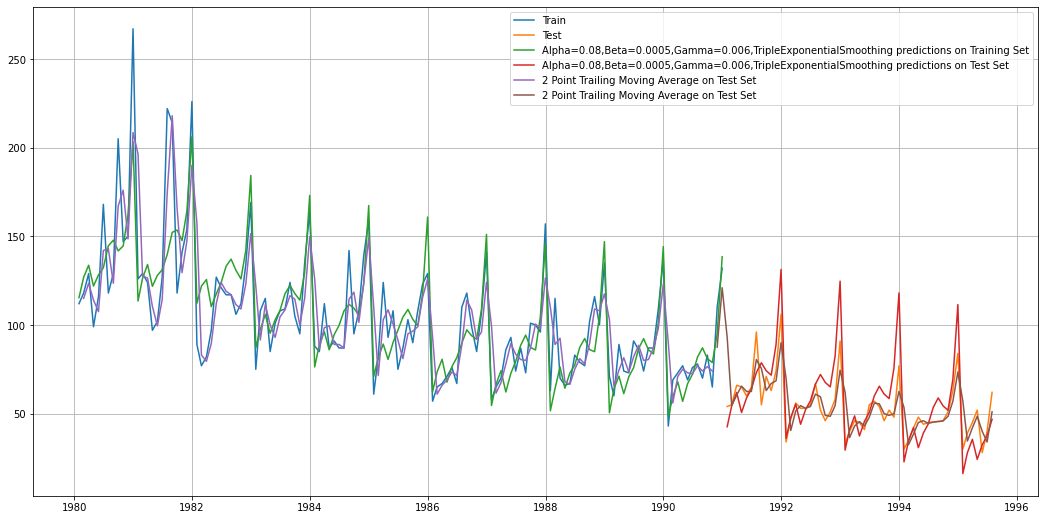

In [168]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.08,Beta=0.0005,Gamma=0.006,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.08,Beta=0.0005,Gamma=0.006,TripleExponentialSmoothing predictions on Test Set')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
# For comparison I have plooted 2 point trailing moving average as well

plt.legend(loc='best')
plt.grid();

In [169]:
Bestmodel1 = ExponentialSmoothing(df1['Rose'].astype("double"),trend='additive',seasonal='additive',freq='M').fit(
    smoothing_level=0.08485622209289158,smoothing_slope=0.0005280630369796539,smoothing_seasonal=0.006764526794519119)

In [170]:
RMSE_Bestmodel1 = metrics.mean_squared_error(df1['Rose'],Bestmodel1.fittedvalues,squared=False)
MAPE_Bestmodel1 = MAPE(df1['Rose'],Bestmodel1.fittedvalues)

print('RMSE:',RMSE_Bestmodel1,'\nMAPE:',MAPE_Bestmodel1)

RMSE: 17.723677428972273 
MAPE: 13.74


In [171]:
# Getting the predictions for the 12 months
prediction_1 = Bestmodel1.forecast(steps=12)
prediction_1

1995-08-31    49.268273
1995-09-30    46.138792
1995-10-31    44.885229
1995-11-30    59.486958
1995-12-31    97.791122
1996-01-31    13.357765
1996-02-29    23.642647
1996-03-31    31.177139
1996-04-30    23.957475
1996-05-31    27.268934
1996-06-30    32.760269
1996-07-31    43.313327
Freq: M, dtype: float64

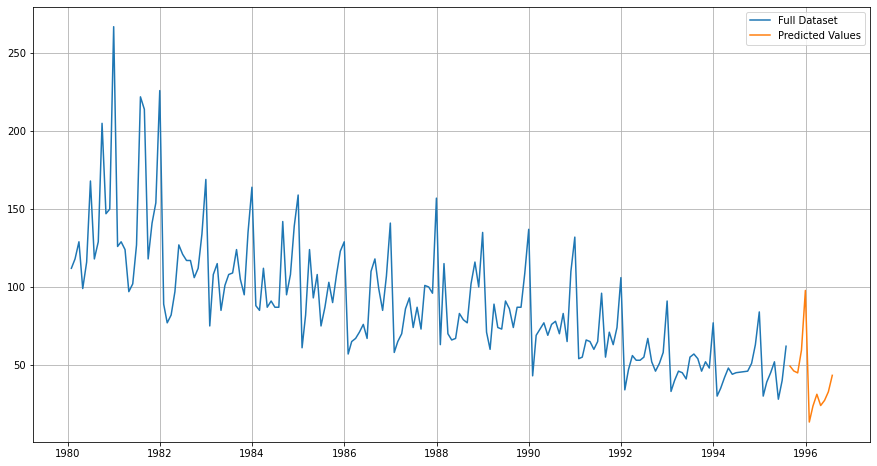

In [172]:
plt.figure(figsize=(15,8))
plt.plot(df1['Rose'],label='Full Dataset')
plt.plot(prediction_1,label='Predicted Values')
plt.legend(loc='best')
plt.grid();

In [173]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,33.082166,49.268273,136.525750
1995-09-30,29.952685,46.138792,133.396269
1995-10-31,28.699122,44.885229,132.142706
1995-11-30,43.300851,59.486958,146.744434
1995-12-31,81.605014,97.791122,185.048598


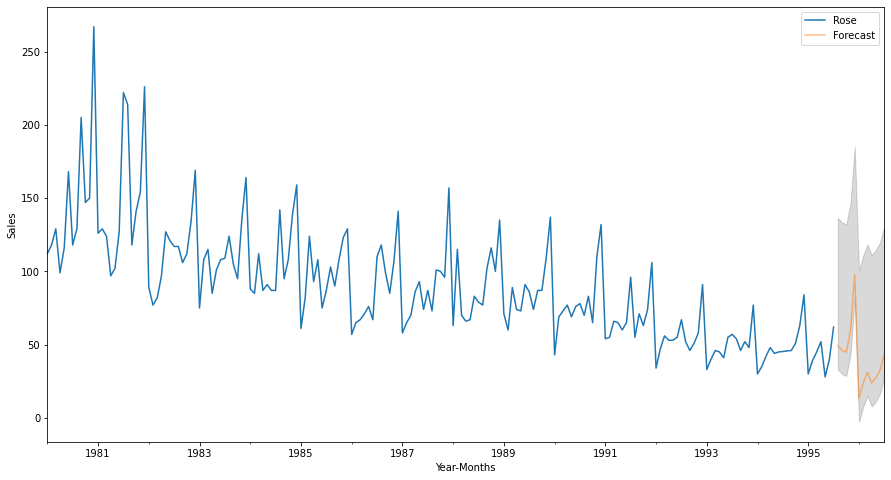

In [174]:
# plot the forecast along with the confidence band

axis = df1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

# 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

* Triple Exponential Model is performing best in this case giving us the least error
* Looking at the bar plot, we can see that on December months the sales are highest. We can use this insights to increase our sales further. We can introduce certain offers in November, December months to attract more customers.
* On Monday mean sales of the wine is highest. We can give certain offers to attract more customers
* Year 1981 has the highest sales recorded till data. We can go back to find out the reasons to which pushed the sales so much.
* Looking at the prediction, we can say that the sales figure are declining each and every year.

###### Looking at the prediction, we can say that the sales figure will be more or less same as that of previous year. Hence some important measures have to be taken to increase the trend. As the trend has been declining constantly through out the years.